# 결정 트리

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [5]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

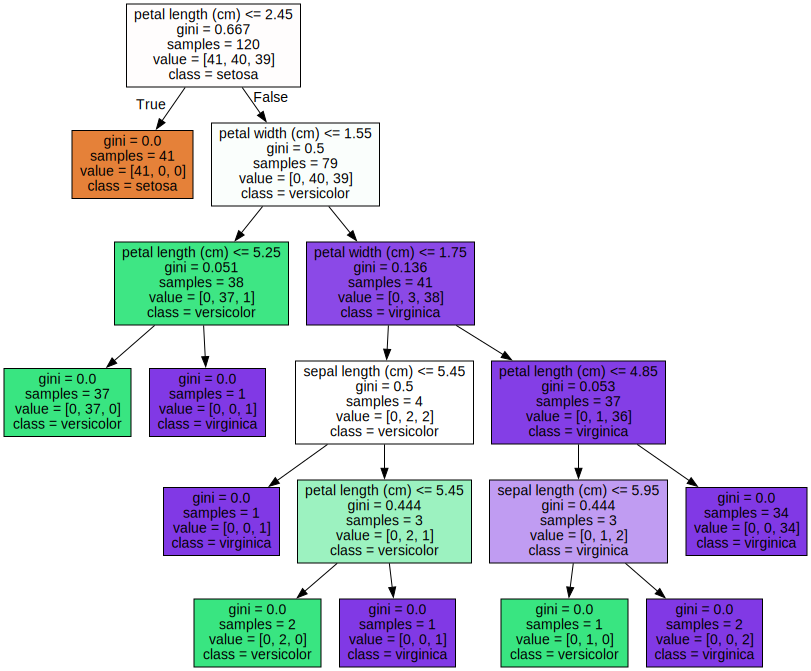

In [6]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
 [0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

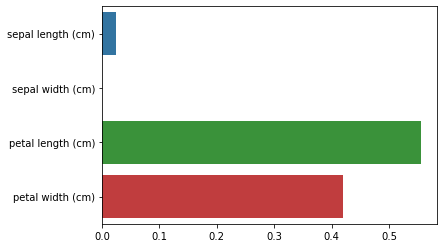

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importances:\n {0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

# petal_length가 가장 피처 중요도가 높음

# 결정 트리 과적합

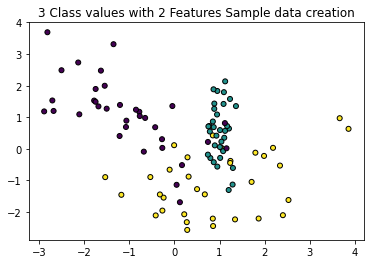

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

make_classification 인수

n_samples : 표본 데이터의 수, 디폴트 100

n_features : 독립 변수의 수, 디폴트 20

n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2

n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2

n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0

n_classes : 종속 변수의 클래스 수, 디폴트 2

n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2

weights : 각 클래스에 할당된 표본 수

In [6]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

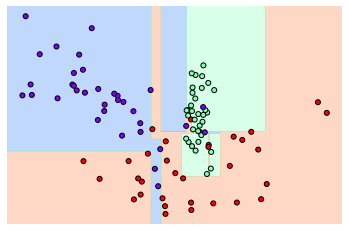

In [7]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아짐

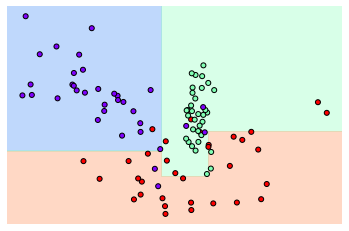

In [8]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [10]:
'''
# 폴더 압축 풀기
import shutil

filename = 'human_activity.zip'
extract_dir = 'human_activity'
archive_format = 'zip'

shutil.unpack_archive(filename, extract_dir, archive_format)
'''

"\n# 폴더 압축 풀기\nimport shutil\n\nfilename = 'human_activity.zip'\nextract_dir = 'human_activity'\narchive_format = 'zip'\n\nshutil.unpack_archive(filename, extract_dir, archive_format)\n"

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [12]:
# 중복된 피처명 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

# 총 42개의 피처명이 중복

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [13]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                                                              if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [14]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 파일은 공백으로 분리 -> 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
    X_train = pd.read_csv('human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩, 칼럼명은 action으로 부여
    y_train = pd.read_csv('human_activity/train/y_train.txt', sep='\s+',header=None, names=['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt', sep='\s+',header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [15]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

# 7352개의 레코드로 561개의 피처를 가지고 있음
# 피처가 전부 float형의 숫자형이므로 별도의 카테고리 인코딩은 수행할 필요가 없음

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [16]:
print(y_train['action'].value_counts())

# 레이블 값은 1, 2, 3, 4, 5, 6의 6개 값이고 분포도는 특정 값으로 왜곡되지 않고 비교적 고르게 분포

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [18]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [19]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [20]:
max_depths = [6, 8, 10, 12, 16, 20, 24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [21]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [22]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8717


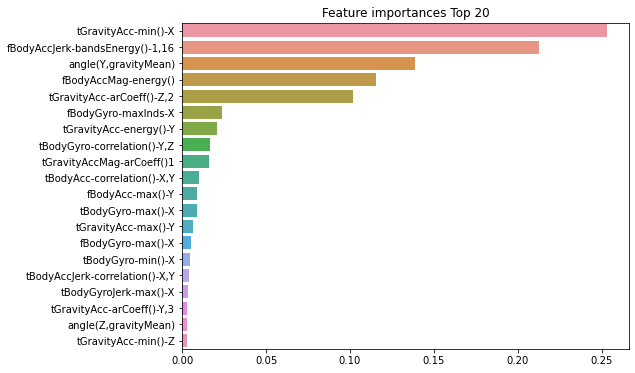

In [23]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위한 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 앙상블 학습

In [24]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [25]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


# 랜덤 포레스트

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9196


In [29]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)  
# CPU 코어의 수가 충분하다면 n_jobs를 늘릴 수록 속도가 증가, -1이면 전체 사용
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


In [30]:
rf_clf1 = RandomForestClassifier(random_state=0, min_samples_leaf=6, max_depth=16, min_samples_split=2)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9260


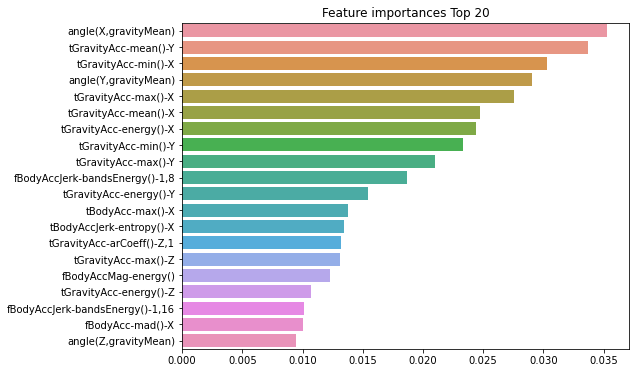

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# GBM

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time() - start_time))

# 너무너무너무너무 오래걸려

KeyboardInterrupt: 

# XGBoost

## 파이썬 래퍼 XGBoost

In [38]:
import xgboost
print(xgboost.__version__)

1.7.3


In [42]:
# 위스콘신 유방암 예측
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [43]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [45]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째칼럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

# 전체 569개의 데이터 세트에서 최종 학습용 409개, 검증용 46개, 테스트용 114개가 추출

(455, 30) (114, 30)
(409, 30) (46, 30)


In [46]:
# 학습, 검증, 테스트용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [47]:
params = {'max_depth' : 3,
         'eta' : 0.05,
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss'
         }
num_rounds = 400

In [49]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기
eval_list = [(dtr, 'train'), (dval, 'eval')]  # 또는 eval_list = [(dval, 'eval')]만 명기해도 무방

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, 
                      early_stopping_rounds=50, evals=eval_list)

# 126번째 방본에서 eval-logloss 값이 가장 낮고, 이후 176번까지 50회 동안 logloss 값은 이보다 향상되지 않았기 때문에 멈춤

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

[170]	train-logloss:0.01312	eval-logloss:0.26133
[171]	train-logloss:0.01304	eval-logloss:0.26148
[172]	train-logloss:0.01297	eval-logloss:0.26157
[173]	train-logloss:0.01285	eval-logloss:0.26253
[174]	train-logloss:0.01278	eval-logloss:0.26229
[175]	train-logloss:0.01267	eval-logloss:0.26086
[176]	train-logloss:0.01258	eval-logloss:0.26103


In [50]:
# xgboost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환
# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측 값 결정하는 로직 추가해야 함

pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현률: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [65]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현률: 0.9740, F1: 0.9677, AUC: 0.9937


## 사이킷런 래퍼 XGBoost

In [66]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric = 'logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [72]:
get_clf_eval(y_test, w_preds, w_pred_proba)

# 위스콘신 데이터 세트가 작기 때문에 전반적으로 검증 데이터를 분리하거나 교차 검증등을 적용할 때 성능 수치가 불안정
# 데이터 건수가 많은 경우, 원본 학습 데이터를 다시 학습과 검증 데이터로 분리하고, 조기 중단 회수를 적절하게 부여할 경우 과적합 개선

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현률: 0.9870, F1: 0.9744, AUC: 0.9954


In [73]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)
ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

[130]	validation_0-logloss:0.01886	validation_1-logloss:0.25712
[131]	validation_0-logloss:0.01863	validation_1-logloss:0.25609
[132]	validation_0-logloss:0.01839	validation_1-logloss:0.25649
[133]	validation_0-logloss:0.01816	validation_1-logloss:0.25789
[134]	validation_0-logloss:0.01802	validation_1-logloss:0.25811
[135]	validation_0-logloss:0.01785	validation_1-logloss:0.25794
[136]	validation_0-logloss:0.01763	validation_1-logloss:0.25876
[137]	validation_0-logloss:0.01748	validation_1-logloss:0.25884
[138]	validation_0-logloss:0.01732	validation_1-logloss:0.25867
[139]	validation_0-logloss:0.01719	validation_1-logloss:0.25876
[140]	validation_0-logloss:0.01696	validation_1-logloss:0.25987
[141]	validation_0-logloss:0.01681	validation_1-logloss:0.25960
[142]	validation_0-logloss:0.01669	validation_1-logloss:0.25982
[143]	validation_0-logloss:0.01656	validation_1-logloss:0.25992
[144]	validation_0-logloss:0.01638	validation_1-logloss:0.26035
[145]	validation_0-logloss:0.01623	valid

In [74]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현률: 0.9740, F1: 0.9677, AUC: 0.9933


In [77]:
# early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

# 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 가능성이 큼

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

# LightGBM

In [79]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] =  dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

In [80]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현률: 0.9740, F1: 0.9677, AUC: 0.9877


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

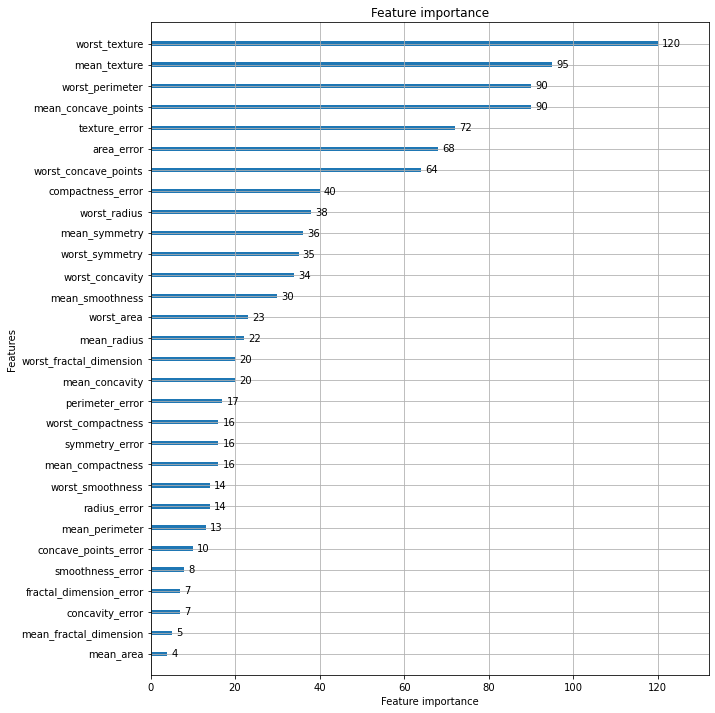

In [82]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

# 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝

In [129]:
from hyperopt import hp

# -10 ~ 10까지 1 간격을 가지는 입력 변수 x와 -15 ~ 15까지 1 간격으로 입력 변수 y 설정
search_space = {'x' : hp.quniform('x', -10, 10, 1), 'y' : hp.quniform('y', -15, 15, 1)}

In [130]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

In [131]:
from hyperopt import fmin, tpe, Trials
# 입력 결괏값을 저장한 Trials 객체값 생성
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변수값을 5번의 입력값 시도(max_evals=5)로 찾아냄
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 280.44trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [132]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 266.75trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [133]:
# fmin()에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss' : 함수 반환값, 'status' : 반환 상태값}와 같은 딕셔너리임
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [134]:
# Trials 객체의 vals 속성에 {'입력변수명' : 개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [135]:
import pandas as pd

# results에서 loss 키 값에 해당하는 밸류들을 추출하여 list로 생성
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성
result_df = pd.DataFrame({'x':trial_val.vals['x'], 'y':trial_val.vals['y'], 'losses':losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


In [136]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [137]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색
xgb_search_space = {
    'max_depth' : hp.quniform('max_depth', 5, 20, 1),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 2, 1),
    'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),
}

In [138]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(
        n_estimators=100, 
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        learning_rate=search_space['learning_rate'],
        colsample_bytree=search_space['colsample_bytree'],
        eval_metric='logloss'
    )
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함
    return {'loss':(-1)*np.mean(accuracy), 'status':STATUS_OK}

In [139]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best)

100%|███████████████████████████████████████████████| 50/50 [00:27<00:00,  1.79trial/s, best loss: -0.9692691994887882]
best: {'colsample_bytree': 0.5519597924589024, 'learning_rate': 0.11623887366004654, 'max_depth': 10.0, 'min_child_weight': 2.0}


In [140]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
    int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.55196, learning_rate:0.11624, max_depth:10, min_child_weight:2


In [141]:
xgb_wrapper = XGBClassifier(
        n_estimators=400, 
        learning_rate=round(best['learning_rate'], 5),
        max_depth=int(best['max_depth']),
        min_child_weight=int(best['min_child_weight']),
        colsample_bytree=round(best['colsample_bytree'], 5)
    )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', 
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.59699	validation_1-logloss:0.62568
[1]	validation_0-logloss:0.52015	validation_1-logloss:0.56761
[2]	validation_0-logloss:0.45655	validation_1-logloss:0.51971
[3]	validation_0-logloss:0.40390	validation_1-logloss:0.47958
[4]	validation_0-logloss:0.35967	validation_1-logloss:0.45470
[5]	validation_0-logloss:0.32205	validation_1-logloss:0.43090
[6]	validation_0-logloss:0.28964	validation_1-logloss:0.40456
[7]	validation_0-logloss:0.26299	validation_1-logloss:0.38964
[8]	validation_0-logloss:0.23798	validation_1-logloss:0.37207
[9]	validation_0-logloss:0.21567	validation_1-logloss:0.35477
[10]	validation_0-logloss:0.19579	validation_1-logloss:0.34068
[11]	validation_0-logloss:0.17916	validation_1-logloss:0.32904
[12]	validation_0-logloss:0.16516	validation_1-logloss:0.32155
[13]	validation_0-logloss:0.15173	validation_1-logloss:0.31565
[14]	validation_0-logloss:0.14067	validation_1-logloss:0.30884
[15]	validation_0-logloss:0.13128	validation_1-logloss:0.30206
[1

[130]	validation_0-logloss:0.01735	validation_1-logloss:0.24477
[131]	validation_0-logloss:0.01730	validation_1-logloss:0.24330
[132]	validation_0-logloss:0.01724	validation_1-logloss:0.24329
[133]	validation_0-logloss:0.01719	validation_1-logloss:0.24405
[134]	validation_0-logloss:0.01714	validation_1-logloss:0.24337
[135]	validation_0-logloss:0.01709	validation_1-logloss:0.24191
[136]	validation_0-logloss:0.01705	validation_1-logloss:0.24261
[137]	validation_0-logloss:0.01699	validation_1-logloss:0.24192
[138]	validation_0-logloss:0.01694	validation_1-logloss:0.24196
[139]	validation_0-logloss:0.01690	validation_1-logloss:0.24196
[140]	validation_0-logloss:0.01685	validation_1-logloss:0.24335
[141]	validation_0-logloss:0.01680	validation_1-logloss:0.24192
[142]	validation_0-logloss:0.01675	validation_1-logloss:0.24197
[143]	validation_0-logloss:0.01671	validation_1-logloss:0.24134
[144]	validation_0-logloss:0.01666	validation_1-logloss:0.24228
[145]	validation_0-logloss:0.01662	valid

# 분류 실습 - 캐글 산탄데르 고객 만족 예측

In [142]:
# 폴더 압축 풀기
import shutil

filename = 'santander-customer-satisfaction.zip'
extract_dir = 'santander'
archive_format = 'zip'

shutil.unpack_archive(filename, extract_dir, archive_format)

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv('santander/train_santander.csv', encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [163]:
cust_df.info()

# 111개의 피처가 float형, 260개의 피처가 int형으로 모든 피처가 숫자 형이며, Null 값은 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [164]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

# 대부분이 만족이며 불만족인 고객은 4%

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [165]:
cust_df.describe()

# var3 칼럼의 경우 min 값이 -999999 : Nan이나 특정 예외 값을 -999999로 변환했을 것임

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [166]:
print(cust_df.var3.value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [167]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

# -999999를 가장 값이 많은 2로 변환
# ID 피처는 단순 식별자에 불과하므로 드롭

피처 데이터 shape:(76020, 369)


In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

# 학습 데이터 세트와 테스트 데이터 세트 모두 TARGET 값의 분포가 원본 데이터와 유사하게 만들어짐(불만족값 4%)

학습 세트 Shape:(60816, 369), 테스트 세트:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [172]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [173]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.82347	validation_1-auc:0.80523
[2]	validation_0-auc:0.83178	validation_1-auc:0.81097
[3]	validation_0-auc:0.83401	validation_1-auc:0.81091
[4]	validation_0-auc:0.83443	validation_1-auc:0.81040
[5]	validation_0-auc:0.83570	validation_1-auc:0.81089
[6]	validation_0-auc:0.83597	validation_1-auc:0.81057
[7]	validation_0-auc:0.83643	validation_1-auc:0.81082
[8]	validation_0-auc:0.83682	validation_1-auc:0.81147
[9]	validation_0-auc:0.83769	validation_1-auc:0.81188
[10]	validation_0-auc:0.83770	validation_1-auc:0.81163
[11]	validation_0-auc:0.83911	validation_1-auc:0.81355
[12]	validation_0-auc:0.83976	validation_1-auc:0.81336
[13]	validation_0-auc:0.84038	validation_1-auc:0.81365
[14]	validation_0-auc:0.84176	validation_1-auc:0.81419
[15]	validation_0-auc:0.84306	validation_1-auc:0.81586
[16]	validation_0-auc:0.84343	validation_1-auc:0.81610
[17]	validation_0-auc:0.84373	validation_1-auc:0.81584
[18]	validation_0-au

[149]	validation_0-auc:0.90500	validation_1-auc:0.83353
[150]	validation_0-auc:0.90513	validation_1-auc:0.83352
[151]	validation_0-auc:0.90531	validation_1-auc:0.83349
[152]	validation_0-auc:0.90548	validation_1-auc:0.83349
[153]	validation_0-auc:0.90551	validation_1-auc:0.83351
[154]	validation_0-auc:0.90563	validation_1-auc:0.83348
[155]	validation_0-auc:0.90572	validation_1-auc:0.83343
[156]	validation_0-auc:0.90579	validation_1-auc:0.83344
[157]	validation_0-auc:0.90591	validation_1-auc:0.83345
[158]	validation_0-auc:0.90621	validation_1-auc:0.83355
[159]	validation_0-auc:0.90630	validation_1-auc:0.83359
[160]	validation_0-auc:0.90643	validation_1-auc:0.83356
[161]	validation_0-auc:0.90657	validation_1-auc:0.83352
[162]	validation_0-auc:0.90672	validation_1-auc:0.83346
[163]	validation_0-auc:0.90694	validation_1-auc:0.83347
[164]	validation_0-auc:0.90714	validation_1-auc:0.83343
[165]	validation_0-auc:0.90720	validation_1-auc:0.83343
[166]	validation_0-auc:0.90727	validation_1-auc:

In [174]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색
xgb_search_space = {
    'max_depth' : hp.quniform('max_depth', 5, 15, 1),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
    'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 0.95),
}

In [175]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 (-1)*roc_auc 평균 값을 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(
        n_estimators=100, 
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습용과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되, Hyperopt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return (-1)*np.mean(roc_auc_list)

In [176]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출, max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best)

100%|██████████████████████████████████████████████████████████████████████████| 50/50 [00:00<?, ?trial/s, best loss=?]
best: {'colsample_bytree': 0.5519597924589024, 'learning_rate': 0.11623887366004654, 'max_depth': 10.0, 'min_child_weight': 2.0}


In [178]:
# n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(
        n_estimators=500, 
        learning_rate=round(best['learning_rate'], 5),
        max_depth=int(best['max_depth']),
        min_child_weight=int(best['min_child_weight']),
        colsample_bytree=round(best['colsample_bytree'], 5)
    )

# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', 
                eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82757	validation_1-auc:0.80933
[1]	validation_0-auc:0.84040	validation_1-auc:0.81233
[2]	validation_0-auc:0.84690	validation_1-auc:0.81425
[3]	validation_0-auc:0.84773	validation_1-auc:0.81404
[4]	validation_0-auc:0.85201	validation_1-auc:0.81477
[5]	validation_0-auc:0.85828	validation_1-auc:0.81607
[6]	validation_0-auc:0.86381	validation_1-auc:0.81748
[7]	validation_0-auc:0.86732	validation_1-auc:0.81850
[8]	validation_0-auc:0.86964	validation_1-auc:0.81871
[9]	validation_0-auc:0.87175	validation_1-auc:0.82117
[10]	validation_0-auc:0.87280	validation_1-auc:0.82129
[11]	validation_0-auc:0.87327	validation_1-auc:0.82126
[12]	validation_0-auc:0.87710	validation_1-auc:0.82254
[13]	validation_0-auc:0.88157	validation_1-auc:0.82316
[14]	validation_0-auc:0.88383	validation_1-auc:0.82392
[15]	validation_0-auc:0.88669	validation_1-auc:0.82490
[16]	validation_0-auc:0.88880	validation_1-auc:0.82570
[17]	validation_0-auc:0.89274	validation_1-auc:0.82601
[18]	validation_0-au

[149]	validation_0-auc:0.95823	validation_1-auc:0.82415
[150]	validation_0-auc:0.95830	validation_1-auc:0.82416
[151]	validation_0-auc:0.95832	validation_1-auc:0.82398
[152]	validation_0-auc:0.95842	validation_1-auc:0.82398
[153]	validation_0-auc:0.95844	validation_1-auc:0.82403
[154]	validation_0-auc:0.95845	validation_1-auc:0.82391
[155]	validation_0-auc:0.95850	validation_1-auc:0.82371
[156]	validation_0-auc:0.95905	validation_1-auc:0.82364
[157]	validation_0-auc:0.95910	validation_1-auc:0.82338
[158]	validation_0-auc:0.95915	validation_1-auc:0.82309
[159]	validation_0-auc:0.95969	validation_1-auc:0.82323
[160]	validation_0-auc:0.96000	validation_1-auc:0.82302
[161]	validation_0-auc:0.96014	validation_1-auc:0.82291
[162]	validation_0-auc:0.96039	validation_1-auc:0.82266
[163]	validation_0-auc:0.96074	validation_1-auc:0.82252
[164]	validation_0-auc:0.96111	validation_1-auc:0.82266
[165]	validation_0-auc:0.96138	validation_1-auc:0.82247
[166]	validation_0-auc:0.96143	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

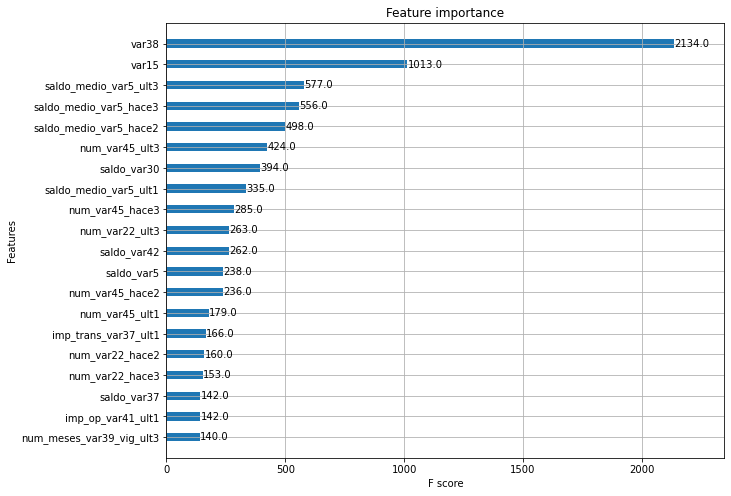

In [179]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [185]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc: 0.823733	valid_1's binary_logloss: 0.141592
[9]	training's a

[85]	training's auc: 0.931704	training's binary_logloss: 0.102221	valid_1's auc: 0.831007	valid_1's binary_logloss: 0.135984
[86]	training's auc: 0.931863	training's binary_logloss: 0.1021	valid_1's auc: 0.831073	valid_1's binary_logloss: 0.135943
[87]	training's auc: 0.932249	training's binary_logloss: 0.101879	valid_1's auc: 0.831022	valid_1's binary_logloss: 0.135962
[88]	training's auc: 0.932765	training's binary_logloss: 0.101605	valid_1's auc: 0.830827	valid_1's binary_logloss: 0.136022
[89]	training's auc: 0.933029	training's binary_logloss: 0.101427	valid_1's auc: 0.830847	valid_1's binary_logloss: 0.13606
[90]	training's auc: 0.933574	training's binary_logloss: 0.101132	valid_1's auc: 0.830845	valid_1's binary_logloss: 0.136074
[91]	training's auc: 0.933718	training's binary_logloss: 0.100966	valid_1's auc: 0.831067	valid_1's binary_logloss: 0.136028
[92]	training's auc: 0.933882	training's binary_logloss: 0.100834	valid_1's auc: 0.830966	valid_1's binary_logloss: 0.13606
[93]

In [189]:
lgbm_search_space = {
    'num_leaves' : hp.quniform('num_leaves', 32, 64, 1),
    'max_depth' : hp.quniform('max_depth', 100, 160, 1),
    'min_child_samples' : hp.quniform('min_child_samples', 60, 100, 1),
    'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2),
    'subsample' : hp.uniform('subsample', 0.7, 1),
}

In [190]:
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(
        n_estimators=100, 
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습용과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc',
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되, Hyperopt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return (-1)*np.mean(roc_auc_list)

In [191]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출, max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(
    fn=objective_func,
    space=lgbm_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[1]	training's auc: 0.82736	training's binary_logloss: 0.162294	valid_1's auc: 0.804818	valid_1's binary_logloss: 0.163544
[2]	training's auc: 0.828309	training's binary_logloss: 0.160269	valid_1's auc: 0.804585	valid_1's binary_logloss: 0.161866
[3]	training's auc: 0.833368	training's binary_logloss: 0.158478	valid_1's auc: 0.806871	valid_1's binary_logloss: 0.16038
[4]	training's auc: 0.834671	training's binary_logloss: 0.156852	valid_1's auc: 0.80706	valid_1's binary_logloss: 0.159053
[5]	training's auc: 0.837783	training's binary_logloss: 0.155354	valid_1's auc: 0.811645	valid_1's binary_logloss: 0.157793
[6]	training's auc: 0.839052	training's binary_logloss: 0.153966	valid_1's auc: 0.81271	valid_1's binary_logloss: 0.156635
[7]	training's auc: 0.841216	training's binary_logloss: 0.152691	valid_1's auc: 0.815103	valid_1's binary_logloss: 0.155585
[8]	training's auc: 0.841859	training's binary_logloss: 0.151499	valid_1's auc: 0.814773	valid_1's binary_logloss: 0.154617
[9]	training

[31]	training's auc: 0.860346	training's binary_logloss: 0.138259	valid_1's auc: 0.835652	valid_1's binary_logloss: 0.137767
[32]	training's auc: 0.860623	training's binary_logloss: 0.137851	valid_1's auc: 0.835706	valid_1's binary_logloss: 0.137481
[33]	training's auc: 0.861233	training's binary_logloss: 0.137451	valid_1's auc: 0.835552	valid_1's binary_logloss: 0.137215
[34]	training's auc: 0.861685	training's binary_logloss: 0.137067	valid_1's auc: 0.835533	valid_1's binary_logloss: 0.136967
[35]	training's auc: 0.862184	training's binary_logloss: 0.136698	valid_1's auc: 0.835406	valid_1's binary_logloss: 0.136728
[36]	training's auc: 0.862667	training's binary_logloss: 0.136338	valid_1's auc: 0.835312	valid_1's binary_logloss: 0.136482
[37]	training's auc: 0.862991	training's binary_logloss: 0.135983	valid_1's auc: 0.835197	valid_1's binary_logloss: 0.136257
[38]	training's auc: 0.863528	training's binary_logloss: 0.135648	valid_1's auc: 0.835072	valid_1's binary_logloss: 0.136031


[99]	training's auc: 0.885685	training's binary_logloss: 0.121466	valid_1's auc: 0.837478	valid_1's binary_logloss: 0.136439
[100]	training's auc: 0.886052	training's binary_logloss: 0.121345	valid_1's auc: 0.837486	valid_1's binary_logloss: 0.136434
[1]	training's auc: 0.840138	training's binary_logloss: 0.15221	valid_1's auc: 0.812785	valid_1's binary_logloss: 0.155558
[2]	training's auc: 0.84777	training's binary_logloss: 0.145745	valid_1's auc: 0.815828	valid_1's binary_logloss: 0.150616
[3]	training's auc: 0.857571	training's binary_logloss: 0.141216	valid_1's auc: 0.821962	valid_1's binary_logloss: 0.147259
[4]	training's auc: 0.861358	training's binary_logloss: 0.137643	valid_1's auc: 0.824181	valid_1's binary_logloss: 0.144869
[5]	training's auc: 0.866559	training's binary_logloss: 0.134811	valid_1's auc: 0.825962	valid_1's binary_logloss: 0.14308
[6]	training's auc: 0.869278	training's binary_logloss: 0.132436	valid_1's auc: 0.827506	valid_1's binary_logloss: 0.141548
[7]	trai

[5]	training's auc: 0.855483	training's binary_logloss: 0.145139	valid_1's auc: 0.820538	valid_1's binary_logloss: 0.149919
[6]	training's auc: 0.856827	training's binary_logloss: 0.14298	valid_1's auc: 0.821063	valid_1's binary_logloss: 0.148333
[7]	training's auc: 0.858639	training's binary_logloss: 0.14107	valid_1's auc: 0.821902	valid_1's binary_logloss: 0.146983
[8]	training's auc: 0.859908	training's binary_logloss: 0.139361	valid_1's auc: 0.822497	valid_1's binary_logloss: 0.145726
[9]	training's auc: 0.863745	training's binary_logloss: 0.137787	valid_1's auc: 0.824282	valid_1's binary_logloss: 0.14463
[10]	training's auc: 0.864538	training's binary_logloss: 0.136428	valid_1's auc: 0.825618	valid_1's binary_logloss: 0.143613
[11]	training's auc: 0.866724	training's binary_logloss: 0.135202	valid_1's auc: 0.826482	valid_1's binary_logloss: 0.142771
[12]	training's auc: 0.867727	training's binary_logloss: 0.134076	valid_1's auc: 0.826391	valid_1's binary_logloss: 0.142056
[13]	tra

[7]	training's auc: 0.856989	training's binary_logloss: 0.140392	valid_1's auc: 0.828256	valid_1's binary_logloss: 0.148457
[8]	training's auc: 0.859909	training's binary_logloss: 0.138736	valid_1's auc: 0.828911	valid_1's binary_logloss: 0.14717
[9]	training's auc: 0.860832	training's binary_logloss: 0.137248	valid_1's auc: 0.828917	valid_1's binary_logloss: 0.146114
[10]	training's auc: 0.862409	training's binary_logloss: 0.135939	valid_1's auc: 0.829175	valid_1's binary_logloss: 0.145124
[11]	training's auc: 0.863555	training's binary_logloss: 0.134642	valid_1's auc: 0.829481	valid_1's binary_logloss: 0.144268
[12]	training's auc: 0.864843	training's binary_logloss: 0.133431	valid_1's auc: 0.829963	valid_1's binary_logloss: 0.143463
[13]	training's auc: 0.866107	training's binary_logloss: 0.13233	valid_1's auc: 0.830554	valid_1's binary_logloss: 0.142752
[14]	training's auc: 0.868249	training's binary_logloss: 0.131313	valid_1's auc: 0.830759	valid_1's binary_logloss: 0.14214
[15]	t

[25]	training's auc: 0.907057	training's binary_logloss: 0.116193	valid_1's auc: 0.834743	valid_1's binary_logloss: 0.13117
[26]	training's auc: 0.908271	training's binary_logloss: 0.115576	valid_1's auc: 0.83419	valid_1's binary_logloss: 0.131239
[27]	training's auc: 0.910741	training's binary_logloss: 0.114927	valid_1's auc: 0.833715	valid_1's binary_logloss: 0.131226
[28]	training's auc: 0.912008	training's binary_logloss: 0.114368	valid_1's auc: 0.834214	valid_1's binary_logloss: 0.131124
[29]	training's auc: 0.91352	training's binary_logloss: 0.113764	valid_1's auc: 0.83465	valid_1's binary_logloss: 0.13107
[30]	training's auc: 0.915049	training's binary_logloss: 0.113149	valid_1's auc: 0.834696	valid_1's binary_logloss: 0.131122
[31]	training's auc: 0.916345	training's binary_logloss: 0.112573	valid_1's auc: 0.835036	valid_1's binary_logloss: 0.131037
[32]	training's auc: 0.917819	training's binary_logloss: 0.112042	valid_1's auc: 0.83531	valid_1's binary_logloss: 0.131005
[33]	t

[44]	training's auc: 0.903386	training's binary_logloss: 0.116708	valid_1's auc: 0.832147	valid_1's binary_logloss: 0.135673
[45]	training's auc: 0.904051	training's binary_logloss: 0.116363	valid_1's auc: 0.832101	valid_1's binary_logloss: 0.135655
[46]	training's auc: 0.905084	training's binary_logloss: 0.116011	valid_1's auc: 0.832359	valid_1's binary_logloss: 0.135612
[47]	training's auc: 0.90589	training's binary_logloss: 0.115647	valid_1's auc: 0.832228	valid_1's binary_logloss: 0.135623
[48]	training's auc: 0.90655	training's binary_logloss: 0.115347	valid_1's auc: 0.832248	valid_1's binary_logloss: 0.135605
[49]	training's auc: 0.907434	training's binary_logloss: 0.115002	valid_1's auc: 0.832089	valid_1's binary_logloss: 0.13564
[50]	training's auc: 0.908012	training's binary_logloss: 0.114685	valid_1's auc: 0.831989	valid_1's binary_logloss: 0.135677
[51]	training's auc: 0.908832	training's binary_logloss: 0.114351	valid_1's auc: 0.831922	valid_1's binary_logloss: 0.135685
[52

[22]	training's auc: 0.879315	training's binary_logloss: 0.126365	valid_1's auc: 0.834742	valid_1's binary_logloss: 0.139403
[23]	training's auc: 0.880364	training's binary_logloss: 0.125781	valid_1's auc: 0.835072	valid_1's binary_logloss: 0.13912
[24]	training's auc: 0.881943	training's binary_logloss: 0.125204	valid_1's auc: 0.83561	valid_1's binary_logloss: 0.13884
[25]	training's auc: 0.883272	training's binary_logloss: 0.12463	valid_1's auc: 0.835652	valid_1's binary_logloss: 0.138559
[26]	training's auc: 0.884765	training's binary_logloss: 0.12408	valid_1's auc: 0.836094	valid_1's binary_logloss: 0.138359
[27]	training's auc: 0.885506	training's binary_logloss: 0.123584	valid_1's auc: 0.835833	valid_1's binary_logloss: 0.138203
[28]	training's auc: 0.886849	training's binary_logloss: 0.123024	valid_1's auc: 0.835788	valid_1's binary_logloss: 0.138025
[29]	training's auc: 0.88783	training's binary_logloss: 0.122537	valid_1's auc: 0.835565	valid_1's binary_logloss: 0.137845
[30]	t

[96]	training's auc: 0.874544	training's binary_logloss: 0.128177	valid_1's auc: 0.829916	valid_1's binary_logloss: 0.138077
[97]	training's auc: 0.874881	training's binary_logloss: 0.128043	valid_1's auc: 0.829996	valid_1's binary_logloss: 0.138012
[98]	training's auc: 0.875162	training's binary_logloss: 0.127906	valid_1's auc: 0.83007	valid_1's binary_logloss: 0.137948
[99]	training's auc: 0.875425	training's binary_logloss: 0.127775	valid_1's auc: 0.830062	valid_1's binary_logloss: 0.13788
[100]	training's auc: 0.875754	training's binary_logloss: 0.127637	valid_1's auc: 0.830052	valid_1's binary_logloss: 0.137831
[1]	training's auc: 0.82749	training's binary_logloss: 0.16565	valid_1's auc: 0.813829	valid_1's binary_logloss: 0.159659
[2]	training's auc: 0.830751	training's binary_logloss: 0.16443	valid_1's auc: 0.816626	valid_1's binary_logloss: 0.158641
[3]	training's auc: 0.831422	training's binary_logloss: 0.163283	valid_1's auc: 0.817276	valid_1's binary_logloss: 0.157694
[4]	tra

[38]	training's auc: 0.855109	training's binary_logloss: 0.13948	valid_1's auc: 0.829801	valid_1's binary_logloss: 0.147373
[39]	training's auc: 0.855549	training's binary_logloss: 0.139157	valid_1's auc: 0.829819	valid_1's binary_logloss: 0.147116
[40]	training's auc: 0.855925	training's binary_logloss: 0.138846	valid_1's auc: 0.82995	valid_1's binary_logloss: 0.146874
[41]	training's auc: 0.856023	training's binary_logloss: 0.138538	valid_1's auc: 0.829887	valid_1's binary_logloss: 0.146628
[42]	training's auc: 0.856746	training's binary_logloss: 0.138238	valid_1's auc: 0.830089	valid_1's binary_logloss: 0.146385
[43]	training's auc: 0.857068	training's binary_logloss: 0.137912	valid_1's auc: 0.830113	valid_1's binary_logloss: 0.146156
[44]	training's auc: 0.857324	training's binary_logloss: 0.137595	valid_1's auc: 0.830292	valid_1's binary_logloss: 0.145927
[45]	training's auc: 0.857489	training's binary_logloss: 0.137315	valid_1's auc: 0.830376	valid_1's binary_logloss: 0.145695
[4

[24]	training's auc: 0.899933	training's binary_logloss: 0.118186	valid_1's auc: 0.833841	valid_1's binary_logloss: 0.131296
[25]	training's auc: 0.90143	training's binary_logloss: 0.117687	valid_1's auc: 0.833563	valid_1's binary_logloss: 0.131341
[26]	training's auc: 0.903014	training's binary_logloss: 0.117196	valid_1's auc: 0.833688	valid_1's binary_logloss: 0.13132
[27]	training's auc: 0.904058	training's binary_logloss: 0.116706	valid_1's auc: 0.833698	valid_1's binary_logloss: 0.131302
[28]	training's auc: 0.905541	training's binary_logloss: 0.116125	valid_1's auc: 0.833632	valid_1's binary_logloss: 0.131355
[29]	training's auc: 0.906988	training's binary_logloss: 0.115617	valid_1's auc: 0.833135	valid_1's binary_logloss: 0.131486
[30]	training's auc: 0.907807	training's binary_logloss: 0.115199	valid_1's auc: 0.833365	valid_1's binary_logloss: 0.131489
[31]	training's auc: 0.909095	training's binary_logloss: 0.114628	valid_1's auc: 0.833802	valid_1's binary_logloss: 0.131357
[3

[21]	training's auc: 0.914937	training's binary_logloss: 0.112277	valid_1's auc: 0.833441	valid_1's binary_logloss: 0.13143
[22]	training's auc: 0.91656	training's binary_logloss: 0.111522	valid_1's auc: 0.83295	valid_1's binary_logloss: 0.131558
[23]	training's auc: 0.918392	training's binary_logloss: 0.110799	valid_1's auc: 0.832312	valid_1's binary_logloss: 0.131713
[24]	training's auc: 0.920611	training's binary_logloss: 0.110043	valid_1's auc: 0.832777	valid_1's binary_logloss: 0.131641
[25]	training's auc: 0.923301	training's binary_logloss: 0.109283	valid_1's auc: 0.832168	valid_1's binary_logloss: 0.131794
[26]	training's auc: 0.924236	training's binary_logloss: 0.108682	valid_1's auc: 0.831565	valid_1's binary_logloss: 0.131899
[27]	training's auc: 0.92634	training's binary_logloss: 0.107761	valid_1's auc: 0.831517	valid_1's binary_logloss: 0.131989
[28]	training's auc: 0.927562	training's binary_logloss: 0.107059	valid_1's auc: 0.831646	valid_1's binary_logloss: 0.131961
[29]

[27]	training's auc: 0.899317	training's binary_logloss: 0.118203	valid_1's auc: 0.835275	valid_1's binary_logloss: 0.131105
[28]	training's auc: 0.900552	training's binary_logloss: 0.117755	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.131172
[29]	training's auc: 0.902357	training's binary_logloss: 0.117273	valid_1's auc: 0.834878	valid_1's binary_logloss: 0.131167
[30]	training's auc: 0.903413	training's binary_logloss: 0.116783	valid_1's auc: 0.834534	valid_1's binary_logloss: 0.131226
[31]	training's auc: 0.904772	training's binary_logloss: 0.116346	valid_1's auc: 0.834551	valid_1's binary_logloss: 0.131209
[32]	training's auc: 0.905714	training's binary_logloss: 0.115927	valid_1's auc: 0.834596	valid_1's binary_logloss: 0.13122
[33]	training's auc: 0.907036	training's binary_logloss: 0.115432	valid_1's auc: 0.834361	valid_1's binary_logloss: 0.131303
[34]	training's auc: 0.908126	training's binary_logloss: 0.11495	valid_1's auc: 0.834322	valid_1's binary_logloss: 0.131314
[3

[55]	training's auc: 0.916301	training's binary_logloss: 0.111102	valid_1's auc: 0.829292	valid_1's binary_logloss: 0.136317
[1]	training's auc: 0.836632	training's binary_logloss: 0.160373	valid_1's auc: 0.819718	valid_1's binary_logloss: 0.155457
[2]	training's auc: 0.84326	training's binary_logloss: 0.155574	valid_1's auc: 0.821805	valid_1's binary_logloss: 0.151654
[3]	training's auc: 0.846733	training's binary_logloss: 0.151871	valid_1's auc: 0.824699	valid_1's binary_logloss: 0.148729
[4]	training's auc: 0.853304	training's binary_logloss: 0.14889	valid_1's auc: 0.830163	valid_1's binary_logloss: 0.146307
[5]	training's auc: 0.858467	training's binary_logloss: 0.1463	valid_1's auc: 0.832164	valid_1's binary_logloss: 0.144403
[6]	training's auc: 0.860449	training's binary_logloss: 0.144063	valid_1's auc: 0.832539	valid_1's binary_logloss: 0.142805
[7]	training's auc: 0.862669	training's binary_logloss: 0.142075	valid_1's auc: 0.83256	valid_1's binary_logloss: 0.141435
[8]	training

[12]	training's auc: 0.906435	training's binary_logloss: 0.114779	valid_1's auc: 0.82774	valid_1's binary_logloss: 0.136755
[13]	training's auc: 0.910874	training's binary_logloss: 0.113358	valid_1's auc: 0.826074	valid_1's binary_logloss: 0.137036
[14]	training's auc: 0.914235	training's binary_logloss: 0.112248	valid_1's auc: 0.825505	valid_1's binary_logloss: 0.13709
[15]	training's auc: 0.916024	training's binary_logloss: 0.111183	valid_1's auc: 0.825384	valid_1's binary_logloss: 0.137142
[16]	training's auc: 0.918503	training's binary_logloss: 0.110063	valid_1's auc: 0.825501	valid_1's binary_logloss: 0.137218
[17]	training's auc: 0.920318	training's binary_logloss: 0.109009	valid_1's auc: 0.824481	valid_1's binary_logloss: 0.137513
[18]	training's auc: 0.92265	training's binary_logloss: 0.107917	valid_1's auc: 0.82415	valid_1's binary_logloss: 0.137608
[19]	training's auc: 0.924544	training's binary_logloss: 0.106888	valid_1's auc: 0.824743	valid_1's binary_logloss: 0.137617
[20]

[22]	training's auc: 0.887956	training's binary_logloss: 0.125123	valid_1's auc: 0.831514	valid_1's binary_logloss: 0.137869
[23]	training's auc: 0.889226	training's binary_logloss: 0.124436	valid_1's auc: 0.831532	valid_1's binary_logloss: 0.137627
[24]	training's auc: 0.890348	training's binary_logloss: 0.123792	valid_1's auc: 0.831582	valid_1's binary_logloss: 0.137387
[25]	training's auc: 0.891491	training's binary_logloss: 0.123204	valid_1's auc: 0.831479	valid_1's binary_logloss: 0.137217
[26]	training's auc: 0.892981	training's binary_logloss: 0.122575	valid_1's auc: 0.831318	valid_1's binary_logloss: 0.137028
[27]	training's auc: 0.894086	training's binary_logloss: 0.122001	valid_1's auc: 0.831195	valid_1's binary_logloss: 0.136887
[28]	training's auc: 0.895331	training's binary_logloss: 0.121427	valid_1's auc: 0.83114	valid_1's binary_logloss: 0.136737
[29]	training's auc: 0.896178	training's binary_logloss: 0.120917	valid_1's auc: 0.830786	valid_1's binary_logloss: 0.136664
[

[55]	training's auc: 0.917883	training's binary_logloss: 0.109815	valid_1's auc: 0.833142	valid_1's binary_logloss: 0.137244
[56]	training's auc: 0.918599	training's binary_logloss: 0.109496	valid_1's auc: 0.832825	valid_1's binary_logloss: 0.137326
[57]	training's auc: 0.919398	training's binary_logloss: 0.109209	valid_1's auc: 0.832683	valid_1's binary_logloss: 0.137346
[58]	training's auc: 0.920128	training's binary_logloss: 0.108894	valid_1's auc: 0.832702	valid_1's binary_logloss: 0.137357
[59]	training's auc: 0.921035	training's binary_logloss: 0.108627	valid_1's auc: 0.832744	valid_1's binary_logloss: 0.137353
[60]	training's auc: 0.921561	training's binary_logloss: 0.108343	valid_1's auc: 0.832903	valid_1's binary_logloss: 0.137356
[61]	training's auc: 0.922328	training's binary_logloss: 0.108066	valid_1's auc: 0.833134	valid_1's binary_logloss: 0.137311
[62]	training's auc: 0.923043	training's binary_logloss: 0.107768	valid_1's auc: 0.833212	valid_1's binary_logloss: 0.137308


[30]	training's auc: 0.923577	training's binary_logloss: 0.105641	valid_1's auc: 0.828933	valid_1's binary_logloss: 0.138793
[31]	training's auc: 0.924796	training's binary_logloss: 0.105017	valid_1's auc: 0.82865	valid_1's binary_logloss: 0.138904
[32]	training's auc: 0.925347	training's binary_logloss: 0.10459	valid_1's auc: 0.828038	valid_1's binary_logloss: 0.139074
[33]	training's auc: 0.92605	training's binary_logloss: 0.104051	valid_1's auc: 0.827891	valid_1's binary_logloss: 0.139086
[34]	training's auc: 0.927614	training's binary_logloss: 0.103339	valid_1's auc: 0.827527	valid_1's binary_logloss: 0.139271
[35]	training's auc: 0.928068	training's binary_logloss: 0.102974	valid_1's auc: 0.826907	valid_1's binary_logloss: 0.139437
[36]	training's auc: 0.928695	training's binary_logloss: 0.102492	valid_1's auc: 0.826196	valid_1's binary_logloss: 0.139648
[37]	training's auc: 0.929705	training's binary_logloss: 0.10195	valid_1's auc: 0.82588	valid_1's binary_logloss: 0.139867
[38]	

[11]	training's auc: 0.860068	training's binary_logloss: 0.138125	valid_1's auc: 0.828763	valid_1's binary_logloss: 0.14718
[12]	training's auc: 0.861129	training's binary_logloss: 0.137013	valid_1's auc: 0.829145	valid_1's binary_logloss: 0.146329
[13]	training's auc: 0.863218	training's binary_logloss: 0.135972	valid_1's auc: 0.829245	valid_1's binary_logloss: 0.145534
[14]	training's auc: 0.864103	training's binary_logloss: 0.134979	valid_1's auc: 0.829457	valid_1's binary_logloss: 0.144863
[15]	training's auc: 0.865363	training's binary_logloss: 0.134062	valid_1's auc: 0.830094	valid_1's binary_logloss: 0.144221
[16]	training's auc: 0.866409	training's binary_logloss: 0.133125	valid_1's auc: 0.830369	valid_1's binary_logloss: 0.143641
[17]	training's auc: 0.867109	training's binary_logloss: 0.13229	valid_1's auc: 0.830638	valid_1's binary_logloss: 0.14312
[18]	training's auc: 0.868527	training's binary_logloss: 0.131524	valid_1's auc: 0.830652	valid_1's binary_logloss: 0.142661
[19

[16]	training's auc: 0.878375	training's binary_logloss: 0.126132	valid_1's auc: 0.832803	valid_1's binary_logloss: 0.132136
[17]	training's auc: 0.879919	training's binary_logloss: 0.125417	valid_1's auc: 0.832884	valid_1's binary_logloss: 0.131994
[18]	training's auc: 0.881454	training's binary_logloss: 0.124694	valid_1's auc: 0.832963	valid_1's binary_logloss: 0.131881
[19]	training's auc: 0.883047	training's binary_logloss: 0.124099	valid_1's auc: 0.83341	valid_1's binary_logloss: 0.13172
[20]	training's auc: 0.884674	training's binary_logloss: 0.123413	valid_1's auc: 0.834615	valid_1's binary_logloss: 0.131509
[21]	training's auc: 0.886836	training's binary_logloss: 0.122805	valid_1's auc: 0.835644	valid_1's binary_logloss: 0.13133
[22]	training's auc: 0.888153	training's binary_logloss: 0.122227	valid_1's auc: 0.835358	valid_1's binary_logloss: 0.1313
[23]	training's auc: 0.889498	training's binary_logloss: 0.121665	valid_1's auc: 0.835194	valid_1's binary_logloss: 0.131252
[24]	

[48]	training's auc: 0.911874	training's binary_logloss: 0.113697	valid_1's auc: 0.829253	valid_1's binary_logloss: 0.136032
[49]	training's auc: 0.912546	training's binary_logloss: 0.113318	valid_1's auc: 0.829113	valid_1's binary_logloss: 0.136063
[50]	training's auc: 0.91329	training's binary_logloss: 0.112964	valid_1's auc: 0.828863	valid_1's binary_logloss: 0.136104
[51]	training's auc: 0.913931	training's binary_logloss: 0.112616	valid_1's auc: 0.828603	valid_1's binary_logloss: 0.136154
[52]	training's auc: 0.914628	training's binary_logloss: 0.112278	valid_1's auc: 0.828248	valid_1's binary_logloss: 0.136203
[53]	training's auc: 0.915298	training's binary_logloss: 0.11194	valid_1's auc: 0.828316	valid_1's binary_logloss: 0.136213
[54]	training's auc: 0.915997	training's binary_logloss: 0.111626	valid_1's auc: 0.828167	valid_1's binary_logloss: 0.13625
[55]	training's auc: 0.916753	training's binary_logloss: 0.111282	valid_1's auc: 0.82824	valid_1's binary_logloss: 0.136245
[56]

[52]	training's auc: 0.914131	training's binary_logloss: 0.111616	valid_1's auc: 0.833071	valid_1's binary_logloss: 0.137279
[53]	training's auc: 0.91476	training's binary_logloss: 0.111255	valid_1's auc: 0.832876	valid_1's binary_logloss: 0.13732
[54]	training's auc: 0.915462	training's binary_logloss: 0.110924	valid_1's auc: 0.832893	valid_1's binary_logloss: 0.137343
[55]	training's auc: 0.9162	training's binary_logloss: 0.110571	valid_1's auc: 0.832711	valid_1's binary_logloss: 0.137367
[56]	training's auc: 0.916909	training's binary_logloss: 0.110236	valid_1's auc: 0.832676	valid_1's binary_logloss: 0.137375
[57]	training's auc: 0.9177	training's binary_logloss: 0.109895	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.137421
[58]	training's auc: 0.918245	training's binary_logloss: 0.109625	valid_1's auc: 0.832157	valid_1's binary_logloss: 0.137476
[59]	training's auc: 0.919175	training's binary_logloss: 0.109318	valid_1's auc: 0.832079	valid_1's binary_logloss: 0.137485
[1]	tr

[23]	training's auc: 0.858765	training's binary_logloss: 0.141335	valid_1's auc: 0.835137	valid_1's binary_logloss: 0.140292
[24]	training's auc: 0.860117	training's binary_logloss: 0.140781	valid_1's auc: 0.835423	valid_1's binary_logloss: 0.139871
[25]	training's auc: 0.860391	training's binary_logloss: 0.140243	valid_1's auc: 0.83552	valid_1's binary_logloss: 0.139482
[26]	training's auc: 0.86115	training's binary_logloss: 0.139712	valid_1's auc: 0.83562	valid_1's binary_logloss: 0.139114
[27]	training's auc: 0.861774	training's binary_logloss: 0.139198	valid_1's auc: 0.835531	valid_1's binary_logloss: 0.138761
[28]	training's auc: 0.862102	training's binary_logloss: 0.138724	valid_1's auc: 0.836016	valid_1's binary_logloss: 0.138418
[29]	training's auc: 0.862732	training's binary_logloss: 0.138259	valid_1's auc: 0.835853	valid_1's binary_logloss: 0.138107
[30]	training's auc: 0.86325	training's binary_logloss: 0.13781	valid_1's auc: 0.835964	valid_1's binary_logloss: 0.137801
[31]	

[95]	training's auc: 0.890362	training's binary_logloss: 0.120164	valid_1's auc: 0.836503	valid_1's binary_logloss: 0.136713
[96]	training's auc: 0.89066	training's binary_logloss: 0.120019	valid_1's auc: 0.836356	valid_1's binary_logloss: 0.136702
[97]	training's auc: 0.890904	training's binary_logloss: 0.1199	valid_1's auc: 0.8365	valid_1's binary_logloss: 0.136678
[1]	training's auc: 0.841967	training's binary_logloss: 0.154699	valid_1's auc: 0.808454	valid_1's binary_logloss: 0.157576
[2]	training's auc: 0.848045	training's binary_logloss: 0.148799	valid_1's auc: 0.81328	valid_1's binary_logloss: 0.152919
[3]	training's auc: 0.857687	training's binary_logloss: 0.144557	valid_1's auc: 0.820847	valid_1's binary_logloss: 0.149641
[4]	training's auc: 0.860302	training's binary_logloss: 0.141075	valid_1's auc: 0.821677	valid_1's binary_logloss: 0.147239
[5]	training's auc: 0.863256	training's binary_logloss: 0.138172	valid_1's auc: 0.823157	valid_1's binary_logloss: 0.145345
[6]	trainin

[25]	training's auc: 0.904922	training's binary_logloss: 0.114957	valid_1's auc: 0.83417	valid_1's binary_logloss: 0.1371
[26]	training's auc: 0.906106	training's binary_logloss: 0.114356	valid_1's auc: 0.833979	valid_1's binary_logloss: 0.1371
[27]	training's auc: 0.907251	training's binary_logloss: 0.113655	valid_1's auc: 0.833846	valid_1's binary_logloss: 0.137057
[28]	training's auc: 0.908849	training's binary_logloss: 0.113047	valid_1's auc: 0.833668	valid_1's binary_logloss: 0.137063
[29]	training's auc: 0.909944	training's binary_logloss: 0.112555	valid_1's auc: 0.833444	valid_1's binary_logloss: 0.137061
[30]	training's auc: 0.91233	training's binary_logloss: 0.111953	valid_1's auc: 0.833885	valid_1's binary_logloss: 0.13698
[31]	training's auc: 0.9135	training's binary_logloss: 0.111394	valid_1's auc: 0.834103	valid_1's binary_logloss: 0.136955
[32]	training's auc: 0.914465	training's binary_logloss: 0.110917	valid_1's auc: 0.834211	valid_1's binary_logloss: 0.136891
[33]	trai

[2]	training's auc: 0.850069	training's binary_logloss: 0.144858	valid_1's auc: 0.830318	valid_1's binary_logloss: 0.143351
[3]	training's auc: 0.856787	training's binary_logloss: 0.140217	valid_1's auc: 0.832612	valid_1's binary_logloss: 0.140112
[4]	training's auc: 0.861967	training's binary_logloss: 0.136667	valid_1's auc: 0.83279	valid_1's binary_logloss: 0.137938
[5]	training's auc: 0.866165	training's binary_logloss: 0.133851	valid_1's auc: 0.832653	valid_1's binary_logloss: 0.136397
[6]	training's auc: 0.869003	training's binary_logloss: 0.131621	valid_1's auc: 0.833731	valid_1's binary_logloss: 0.134972
[7]	training's auc: 0.873249	training's binary_logloss: 0.129588	valid_1's auc: 0.832667	valid_1's binary_logloss: 0.134188
[8]	training's auc: 0.876999	training's binary_logloss: 0.127784	valid_1's auc: 0.832139	valid_1's binary_logloss: 0.133572
[9]	training's auc: 0.879535	training's binary_logloss: 0.126318	valid_1's auc: 0.832206	valid_1's binary_logloss: 0.13314
[10]	train

[48]	training's auc: 0.873573	training's binary_logloss: 0.129208	valid_1's auc: 0.829939	valid_1's binary_logloss: 0.138669
[49]	training's auc: 0.873905	training's binary_logloss: 0.128955	valid_1's auc: 0.829945	valid_1's binary_logloss: 0.138544
[50]	training's auc: 0.874277	training's binary_logloss: 0.128688	valid_1's auc: 0.829978	valid_1's binary_logloss: 0.138432
[51]	training's auc: 0.874941	training's binary_logloss: 0.12842	valid_1's auc: 0.830216	valid_1's binary_logloss: 0.138299
[52]	training's auc: 0.875707	training's binary_logloss: 0.128168	valid_1's auc: 0.830501	valid_1's binary_logloss: 0.138184
[53]	training's auc: 0.876076	training's binary_logloss: 0.127936	valid_1's auc: 0.830732	valid_1's binary_logloss: 0.138059
[54]	training's auc: 0.87643	training's binary_logloss: 0.127714	valid_1's auc: 0.83075	valid_1's binary_logloss: 0.13794
[55]	training's auc: 0.877021	training's binary_logloss: 0.12747	valid_1's auc: 0.830883	valid_1's binary_logloss: 0.137834
[56]	

[78]	training's auc: 0.883856	training's binary_logloss: 0.125106	valid_1's auc: 0.835731	valid_1's binary_logloss: 0.131629
[79]	training's auc: 0.88424	training's binary_logloss: 0.124924	valid_1's auc: 0.835658	valid_1's binary_logloss: 0.131583
[80]	training's auc: 0.88463	training's binary_logloss: 0.124756	valid_1's auc: 0.835664	valid_1's binary_logloss: 0.131536
[81]	training's auc: 0.885186	training's binary_logloss: 0.124565	valid_1's auc: 0.83563	valid_1's binary_logloss: 0.131494
[82]	training's auc: 0.885501	training's binary_logloss: 0.124408	valid_1's auc: 0.835686	valid_1's binary_logloss: 0.131441
[83]	training's auc: 0.885943	training's binary_logloss: 0.124239	valid_1's auc: 0.83576	valid_1's binary_logloss: 0.131401
[1]	training's auc: 0.828756	training's binary_logloss: 0.160855	valid_1's auc: 0.806893	valid_1's binary_logloss: 0.166476
[2]	training's auc: 0.830839	training's binary_logloss: 0.158872	valid_1's auc: 0.810619	valid_1's binary_logloss: 0.1646
[3]	trai

[25]	training's auc: 0.866361	training's binary_logloss: 0.134065	valid_1's auc: 0.824538	valid_1's binary_logloss: 0.141863
[26]	training's auc: 0.866887	training's binary_logloss: 0.133561	valid_1's auc: 0.82456	valid_1's binary_logloss: 0.141559
[27]	training's auc: 0.867573	training's binary_logloss: 0.133083	valid_1's auc: 0.825534	valid_1's binary_logloss: 0.141242
[28]	training's auc: 0.868484	training's binary_logloss: 0.132603	valid_1's auc: 0.826002	valid_1's binary_logloss: 0.140903
[29]	training's auc: 0.869115	training's binary_logloss: 0.132124	valid_1's auc: 0.826141	valid_1's binary_logloss: 0.140626
[30]	training's auc: 0.870474	training's binary_logloss: 0.131664	valid_1's auc: 0.826069	valid_1's binary_logloss: 0.140389
[31]	training's auc: 0.871711	training's binary_logloss: 0.131236	valid_1's auc: 0.826445	valid_1's binary_logloss: 0.140155
[32]	training's auc: 0.872359	training's binary_logloss: 0.130801	valid_1's auc: 0.826727	valid_1's binary_logloss: 0.139918
[

[55]	training's auc: 0.882126	training's binary_logloss: 0.126116	valid_1's auc: 0.834707	valid_1's binary_logloss: 0.131957
[56]	training's auc: 0.882874	training's binary_logloss: 0.12587	valid_1's auc: 0.834743	valid_1's binary_logloss: 0.131905
[57]	training's auc: 0.883581	training's binary_logloss: 0.125596	valid_1's auc: 0.834895	valid_1's binary_logloss: 0.131809
[58]	training's auc: 0.884049	training's binary_logloss: 0.125351	valid_1's auc: 0.835105	valid_1's binary_logloss: 0.131733
[59]	training's auc: 0.884554	training's binary_logloss: 0.125114	valid_1's auc: 0.834824	valid_1's binary_logloss: 0.131703
[60]	training's auc: 0.884998	training's binary_logloss: 0.12488	valid_1's auc: 0.834936	valid_1's binary_logloss: 0.131629
[61]	training's auc: 0.885397	training's binary_logloss: 0.124662	valid_1's auc: 0.83506	valid_1's binary_logloss: 0.131569
[62]	training's auc: 0.885974	training's binary_logloss: 0.124441	valid_1's auc: 0.835145	valid_1's binary_logloss: 0.13152
[63]

[4]	training's auc: 0.853695	training's binary_logloss: 0.144715	valid_1's auc: 0.820072	valid_1's binary_logloss: 0.149576
[5]	training's auc: 0.855582	training's binary_logloss: 0.142005	valid_1's auc: 0.822045	valid_1's binary_logloss: 0.147567
[6]	training's auc: 0.858271	training's binary_logloss: 0.139767	valid_1's auc: 0.822569	valid_1's binary_logloss: 0.145999
[7]	training's auc: 0.862238	training's binary_logloss: 0.137782	valid_1's auc: 0.825416	valid_1's binary_logloss: 0.144594
[8]	training's auc: 0.863711	training's binary_logloss: 0.136055	valid_1's auc: 0.825154	valid_1's binary_logloss: 0.143459
[9]	training's auc: 0.866373	training's binary_logloss: 0.134499	valid_1's auc: 0.826448	valid_1's binary_logloss: 0.142412
[10]	training's auc: 0.867611	training's binary_logloss: 0.133116	valid_1's auc: 0.826477	valid_1's binary_logloss: 0.141546
[11]	training's auc: 0.868442	training's binary_logloss: 0.131815	valid_1's auc: 0.82736	valid_1's binary_logloss: 0.140822
[12]	tr

[29]	training's auc: 0.894928	training's binary_logloss: 0.118261	valid_1's auc: 0.836689	valid_1's binary_logloss: 0.136795
[30]	training's auc: 0.895768	training's binary_logloss: 0.11784	valid_1's auc: 0.836629	valid_1's binary_logloss: 0.136735
[31]	training's auc: 0.896915	training's binary_logloss: 0.117374	valid_1's auc: 0.836585	valid_1's binary_logloss: 0.136655
[32]	training's auc: 0.898037	training's binary_logloss: 0.11692	valid_1's auc: 0.836482	valid_1's binary_logloss: 0.136621
[33]	training's auc: 0.899337	training's binary_logloss: 0.116478	valid_1's auc: 0.836678	valid_1's binary_logloss: 0.136571
[34]	training's auc: 0.900153	training's binary_logloss: 0.116093	valid_1's auc: 0.836059	valid_1's binary_logloss: 0.136596
[35]	training's auc: 0.901012	training's binary_logloss: 0.11569	valid_1's auc: 0.836016	valid_1's binary_logloss: 0.136576
[36]	training's auc: 0.90189	training's binary_logloss: 0.115297	valid_1's auc: 0.83613	valid_1's binary_logloss: 0.136531
[37]	

[88]	training's auc: 0.867758	training's binary_logloss: 0.130286	valid_1's auc: 0.829828	valid_1's binary_logloss: 0.138608
[89]	training's auc: 0.867994	training's binary_logloss: 0.130154	valid_1's auc: 0.829968	valid_1's binary_logloss: 0.138537
[90]	training's auc: 0.868119	training's binary_logloss: 0.130029	valid_1's auc: 0.829946	valid_1's binary_logloss: 0.138468
[91]	training's auc: 0.868337	training's binary_logloss: 0.129898	valid_1's auc: 0.829907	valid_1's binary_logloss: 0.138403
[92]	training's auc: 0.868743	training's binary_logloss: 0.129756	valid_1's auc: 0.829968	valid_1's binary_logloss: 0.138325
[93]	training's auc: 0.86889	training's binary_logloss: 0.129638	valid_1's auc: 0.830016	valid_1's binary_logloss: 0.138255
[94]	training's auc: 0.869093	training's binary_logloss: 0.129517	valid_1's auc: 0.830061	valid_1's binary_logloss: 0.138196
[95]	training's auc: 0.869267	training's binary_logloss: 0.129392	valid_1's auc: 0.830109	valid_1's binary_logloss: 0.138121
[

[18]	training's auc: 0.841426	training's binary_logloss: 0.148453	valid_1's auc: 0.822908	valid_1's binary_logloss: 0.154665
[19]	training's auc: 0.843549	training's binary_logloss: 0.147908	valid_1's auc: 0.825958	valid_1's binary_logloss: 0.154166
[20]	training's auc: 0.844024	training's binary_logloss: 0.14738	valid_1's auc: 0.826268	valid_1's binary_logloss: 0.153687
[21]	training's auc: 0.844905	training's binary_logloss: 0.146859	valid_1's auc: 0.826892	valid_1's binary_logloss: 0.15323
[22]	training's auc: 0.84534	training's binary_logloss: 0.146354	valid_1's auc: 0.826983	valid_1's binary_logloss: 0.152789
[23]	training's auc: 0.846043	training's binary_logloss: 0.145869	valid_1's auc: 0.827214	valid_1's binary_logloss: 0.152358
[24]	training's auc: 0.846484	training's binary_logloss: 0.145402	valid_1's auc: 0.827173	valid_1's binary_logloss: 0.151945
[25]	training's auc: 0.846932	training's binary_logloss: 0.14495	valid_1's auc: 0.827379	valid_1's binary_logloss: 0.151547
[26]

[48]	training's auc: 0.876133	training's binary_logloss: 0.126187	valid_1's auc: 0.830518	valid_1's binary_logloss: 0.136948
[49]	training's auc: 0.876539	training's binary_logloss: 0.125949	valid_1's auc: 0.830328	valid_1's binary_logloss: 0.136879
[50]	training's auc: 0.87708	training's binary_logloss: 0.125727	valid_1's auc: 0.830416	valid_1's binary_logloss: 0.136782
[51]	training's auc: 0.877571	training's binary_logloss: 0.125512	valid_1's auc: 0.83068	valid_1's binary_logloss: 0.136676
[52]	training's auc: 0.878084	training's binary_logloss: 0.125287	valid_1's auc: 0.830843	valid_1's binary_logloss: 0.136612
[53]	training's auc: 0.878514	training's binary_logloss: 0.125075	valid_1's auc: 0.83109	valid_1's binary_logloss: 0.136506
[54]	training's auc: 0.878906	training's binary_logloss: 0.124877	valid_1's auc: 0.831133	valid_1's binary_logloss: 0.136436
[55]	training's auc: 0.879403	training's binary_logloss: 0.124664	valid_1's auc: 0.831245	valid_1's binary_logloss: 0.136398
[56

[27]	training's auc: 0.859201	training's binary_logloss: 0.132471	valid_1's auc: 0.832007	valid_1's binary_logloss: 0.141436
[28]	training's auc: 0.860015	training's binary_logloss: 0.132049	valid_1's auc: 0.832373	valid_1's binary_logloss: 0.141119
[29]	training's auc: 0.861097	training's binary_logloss: 0.131633	valid_1's auc: 0.832369	valid_1's binary_logloss: 0.140852
[30]	training's auc: 0.86184	training's binary_logloss: 0.131247	valid_1's auc: 0.832784	valid_1's binary_logloss: 0.140562
[31]	training's auc: 0.862504	training's binary_logloss: 0.130861	valid_1's auc: 0.832839	valid_1's binary_logloss: 0.140332
[32]	training's auc: 0.86325	training's binary_logloss: 0.130493	valid_1's auc: 0.833038	valid_1's binary_logloss: 0.140062
[33]	training's auc: 0.865133	training's binary_logloss: 0.130131	valid_1's auc: 0.834605	valid_1's binary_logloss: 0.139835
[34]	training's auc: 0.865854	training's binary_logloss: 0.129799	valid_1's auc: 0.834841	valid_1's binary_logloss: 0.139598
[3

[17]	training's auc: 0.876411	training's binary_logloss: 0.128545	valid_1's auc: 0.834763	valid_1's binary_logloss: 0.132739
[18]	training's auc: 0.877443	training's binary_logloss: 0.127839	valid_1's auc: 0.834821	valid_1's binary_logloss: 0.13249
[19]	training's auc: 0.878844	training's binary_logloss: 0.127217	valid_1's auc: 0.83473	valid_1's binary_logloss: 0.132273
[20]	training's auc: 0.879851	training's binary_logloss: 0.126567	valid_1's auc: 0.834151	valid_1's binary_logloss: 0.13212
[21]	training's auc: 0.881419	training's binary_logloss: 0.125935	valid_1's auc: 0.833962	valid_1's binary_logloss: 0.131956
[22]	training's auc: 0.882861	training's binary_logloss: 0.125338	valid_1's auc: 0.834076	valid_1's binary_logloss: 0.131799
[23]	training's auc: 0.884342	training's binary_logloss: 0.124705	valid_1's auc: 0.834566	valid_1's binary_logloss: 0.131674
[24]	training's auc: 0.886289	training's binary_logloss: 0.124054	valid_1's auc: 0.834887	valid_1's binary_logloss: 0.131495
[25

[16]	training's auc: 0.855193	training's binary_logloss: 0.139027	valid_1's auc: 0.822101	valid_1's binary_logloss: 0.144734
[17]	training's auc: 0.855493	training's binary_logloss: 0.138286	valid_1's auc: 0.822268	valid_1's binary_logloss: 0.144166
[18]	training's auc: 0.856606	training's binary_logloss: 0.137573	valid_1's auc: 0.822909	valid_1's binary_logloss: 0.143621
[19]	training's auc: 0.857946	training's binary_logloss: 0.136915	valid_1's auc: 0.823079	valid_1's binary_logloss: 0.143112
[20]	training's auc: 0.858425	training's binary_logloss: 0.136301	valid_1's auc: 0.823234	valid_1's binary_logloss: 0.142644
[21]	training's auc: 0.858909	training's binary_logloss: 0.135726	valid_1's auc: 0.823697	valid_1's binary_logloss: 0.142206
[22]	training's auc: 0.859498	training's binary_logloss: 0.135164	valid_1's auc: 0.823866	valid_1's binary_logloss: 0.141815
[23]	training's auc: 0.859896	training's binary_logloss: 0.134611	valid_1's auc: 0.823857	valid_1's binary_logloss: 0.141457


[46]	training's auc: 0.873085	training's binary_logloss: 0.12885	valid_1's auc: 0.834239	valid_1's binary_logloss: 0.132193
[47]	training's auc: 0.873513	training's binary_logloss: 0.128593	valid_1's auc: 0.834294	valid_1's binary_logloss: 0.13209
[48]	training's auc: 0.873912	training's binary_logloss: 0.128352	valid_1's auc: 0.834306	valid_1's binary_logloss: 0.131999
[49]	training's auc: 0.874352	training's binary_logloss: 0.128124	valid_1's auc: 0.834282	valid_1's binary_logloss: 0.131909
[50]	training's auc: 0.87503	training's binary_logloss: 0.127887	valid_1's auc: 0.83436	valid_1's binary_logloss: 0.131833
[51]	training's auc: 0.875603	training's binary_logloss: 0.127648	valid_1's auc: 0.834479	valid_1's binary_logloss: 0.131745
[52]	training's auc: 0.876223	training's binary_logloss: 0.127401	valid_1's auc: 0.834345	valid_1's binary_logloss: 0.131674
[53]	training's auc: 0.877027	training's binary_logloss: 0.127167	valid_1's auc: 0.834283	valid_1's binary_logloss: 0.131625
[54]

[76]	training's auc: 0.888579	training's binary_logloss: 0.1204	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.136204
[77]	training's auc: 0.889093	training's binary_logloss: 0.120245	valid_1's auc: 0.836873	valid_1's binary_logloss: 0.136184
[78]	training's auc: 0.889683	training's binary_logloss: 0.120092	valid_1's auc: 0.836889	valid_1's binary_logloss: 0.136168
[79]	training's auc: 0.890064	training's binary_logloss: 0.119948	valid_1's auc: 0.836748	valid_1's binary_logloss: 0.136168
[80]	training's auc: 0.890471	training's binary_logloss: 0.119809	valid_1's auc: 0.836724	valid_1's binary_logloss: 0.136165
[81]	training's auc: 0.89074	training's binary_logloss: 0.119683	valid_1's auc: 0.836847	valid_1's binary_logloss: 0.136162
[82]	training's auc: 0.891046	training's binary_logloss: 0.119538	valid_1's auc: 0.836654	valid_1's binary_logloss: 0.136153
[83]	training's auc: 0.891408	training's binary_logloss: 0.119421	valid_1's auc: 0.836912	valid_1's binary_logloss: 0.136131
[1]

[26]	training's auc: 0.867188	training's binary_logloss: 0.13346	valid_1's auc: 0.835882	valid_1's binary_logloss: 0.134504
[27]	training's auc: 0.867667	training's binary_logloss: 0.133001	valid_1's auc: 0.83598	valid_1's binary_logloss: 0.13423
[28]	training's auc: 0.868304	training's binary_logloss: 0.132557	valid_1's auc: 0.836334	valid_1's binary_logloss: 0.13397
[29]	training's auc: 0.86877	training's binary_logloss: 0.132128	valid_1's auc: 0.83617	valid_1's binary_logloss: 0.13374
[30]	training's auc: 0.869245	training's binary_logloss: 0.131741	valid_1's auc: 0.835854	valid_1's binary_logloss: 0.133552
[31]	training's auc: 0.869738	training's binary_logloss: 0.131363	valid_1's auc: 0.835794	valid_1's binary_logloss: 0.133366
[32]	training's auc: 0.870569	training's binary_logloss: 0.130962	valid_1's auc: 0.836025	valid_1's binary_logloss: 0.133178
[33]	training's auc: 0.871004	training's binary_logloss: 0.130558	valid_1's auc: 0.835943	valid_1's binary_logloss: 0.133007
[34]	tr

[56]	training's auc: 0.886452	training's binary_logloss: 0.121309	valid_1's auc: 0.836469	valid_1's binary_logloss: 0.13668
[57]	training's auc: 0.886863	training's binary_logloss: 0.121078	valid_1's auc: 0.836392	valid_1's binary_logloss: 0.13666
[58]	training's auc: 0.887326	training's binary_logloss: 0.120854	valid_1's auc: 0.836364	valid_1's binary_logloss: 0.136627
[59]	training's auc: 0.887866	training's binary_logloss: 0.120624	valid_1's auc: 0.836521	valid_1's binary_logloss: 0.13657
[60]	training's auc: 0.88867	training's binary_logloss: 0.120406	valid_1's auc: 0.836777	valid_1's binary_logloss: 0.136535
[61]	training's auc: 0.889039	training's binary_logloss: 0.120234	valid_1's auc: 0.836747	valid_1's binary_logloss: 0.136507
[62]	training's auc: 0.889571	training's binary_logloss: 0.120034	valid_1's auc: 0.836798	valid_1's binary_logloss: 0.136463
[63]	training's auc: 0.890045	training's binary_logloss: 0.119848	valid_1's auc: 0.836779	valid_1's binary_logloss: 0.136423
[64]

[45]	training's auc: 0.910033	training's binary_logloss: 0.115157	valid_1's auc: 0.83586	valid_1's binary_logloss: 0.13074
[46]	training's auc: 0.910565	training's binary_logloss: 0.114884	valid_1's auc: 0.835814	valid_1's binary_logloss: 0.130764
[47]	training's auc: 0.911279	training's binary_logloss: 0.114544	valid_1's auc: 0.835861	valid_1's binary_logloss: 0.130758
[48]	training's auc: 0.912165	training's binary_logloss: 0.114192	valid_1's auc: 0.835826	valid_1's binary_logloss: 0.130778
[49]	training's auc: 0.913024	training's binary_logloss: 0.113829	valid_1's auc: 0.835553	valid_1's binary_logloss: 0.130822
[50]	training's auc: 0.913787	training's binary_logloss: 0.113536	valid_1's auc: 0.835378	valid_1's binary_logloss: 0.130847
[51]	training's auc: 0.914369	training's binary_logloss: 0.113203	valid_1's auc: 0.834941	valid_1's binary_logloss: 0.130919
[52]	training's auc: 0.915014	training's binary_logloss: 0.1129	valid_1's auc: 0.835186	valid_1's binary_logloss: 0.130899
[53]

[55]	training's auc: 0.861411	training's binary_logloss: 0.137193	valid_1's auc: 0.826837	valid_1's binary_logloss: 0.143415
[56]	training's auc: 0.862355	training's binary_logloss: 0.136964	valid_1's auc: 0.827062	valid_1's binary_logloss: 0.143249
[57]	training's auc: 0.862447	training's binary_logloss: 0.13674	valid_1's auc: 0.827077	valid_1's binary_logloss: 0.143098
[58]	training's auc: 0.86267	training's binary_logloss: 0.13652	valid_1's auc: 0.827044	valid_1's binary_logloss: 0.142933
[59]	training's auc: 0.86276	training's binary_logloss: 0.136306	valid_1's auc: 0.827203	valid_1's binary_logloss: 0.142786
[60]	training's auc: 0.862878	training's binary_logloss: 0.136096	valid_1's auc: 0.827171	valid_1's binary_logloss: 0.142631
[61]	training's auc: 0.863078	training's binary_logloss: 0.135889	valid_1's auc: 0.827132	valid_1's binary_logloss: 0.142495
[62]	training's auc: 0.863155	training's binary_logloss: 0.13569	valid_1's auc: 0.827165	valid_1's binary_logloss: 0.14236
[63]	t

[85]	training's auc: 0.867568	training's binary_logloss: 0.133965	valid_1's auc: 0.835309	valid_1's binary_logloss: 0.134983
[86]	training's auc: 0.867657	training's binary_logloss: 0.133824	valid_1's auc: 0.835304	valid_1's binary_logloss: 0.134897
[87]	training's auc: 0.867776	training's binary_logloss: 0.133678	valid_1's auc: 0.835276	valid_1's binary_logloss: 0.134807
[88]	training's auc: 0.868026	training's binary_logloss: 0.133529	valid_1's auc: 0.835248	valid_1's binary_logloss: 0.13472
[89]	training's auc: 0.868112	training's binary_logloss: 0.13339	valid_1's auc: 0.83525	valid_1's binary_logloss: 0.134633
[90]	training's auc: 0.868241	training's binary_logloss: 0.13325	valid_1's auc: 0.835224	valid_1's binary_logloss: 0.134558
[91]	training's auc: 0.868385	training's binary_logloss: 0.133118	valid_1's auc: 0.835193	valid_1's binary_logloss: 0.134482
[1]	training's auc: 0.8279	training's binary_logloss: 0.161984	valid_1's auc: 0.808853	valid_1's binary_logloss: 0.167469
[2]	tra

[24]	training's auc: 0.868057	training's binary_logloss: 0.131268	valid_1's auc: 0.827164	valid_1's binary_logloss: 0.139799
[25]	training's auc: 0.869406	training's binary_logloss: 0.130745	valid_1's auc: 0.827632	valid_1's binary_logloss: 0.1395
[26]	training's auc: 0.869894	training's binary_logloss: 0.130241	valid_1's auc: 0.827651	valid_1's binary_logloss: 0.139269
[27]	training's auc: 0.870589	training's binary_logloss: 0.129791	valid_1's auc: 0.828387	valid_1's binary_logloss: 0.138958
[28]	training's auc: 0.871223	training's binary_logloss: 0.129331	valid_1's auc: 0.828562	valid_1's binary_logloss: 0.138734
[29]	training's auc: 0.872266	training's binary_logloss: 0.12891	valid_1's auc: 0.82878	valid_1's binary_logloss: 0.138506
[30]	training's auc: 0.872823	training's binary_logloss: 0.128523	valid_1's auc: 0.828906	valid_1's binary_logloss: 0.138311
[31]	training's auc: 0.873969	training's binary_logloss: 0.128093	valid_1's auc: 0.829252	valid_1's binary_logloss: 0.138089
[32]

[7]	training's auc: 0.847464	training's binary_logloss: 0.145586	valid_1's auc: 0.825476	valid_1's binary_logloss: 0.152471
[8]	training's auc: 0.848529	training's binary_logloss: 0.144099	valid_1's auc: 0.8265	valid_1's binary_logloss: 0.151146
[9]	training's auc: 0.850361	training's binary_logloss: 0.142737	valid_1's auc: 0.827567	valid_1's binary_logloss: 0.149975
[10]	training's auc: 0.851257	training's binary_logloss: 0.141475	valid_1's auc: 0.827633	valid_1's binary_logloss: 0.148933
[11]	training's auc: 0.853285	training's binary_logloss: 0.140325	valid_1's auc: 0.828496	valid_1's binary_logloss: 0.147993
[12]	training's auc: 0.854296	training's binary_logloss: 0.139282	valid_1's auc: 0.829083	valid_1's binary_logloss: 0.147125
[13]	training's auc: 0.85528	training's binary_logloss: 0.138318	valid_1's auc: 0.829273	valid_1's binary_logloss: 0.146331
[14]	training's auc: 0.855379	training's binary_logloss: 0.137425	valid_1's auc: 0.829632	valid_1's binary_logloss: 0.145642
[15]	t

[37]	training's auc: 0.867498	training's binary_logloss: 0.13453	valid_1's auc: 0.827976	valid_1's binary_logloss: 0.142039
[38]	training's auc: 0.86769	training's binary_logloss: 0.134188	valid_1's auc: 0.828063	valid_1's binary_logloss: 0.141801
[39]	training's auc: 0.868353	training's binary_logloss: 0.133845	valid_1's auc: 0.828504	valid_1's binary_logloss: 0.141567
[40]	training's auc: 0.868842	training's binary_logloss: 0.133529	valid_1's auc: 0.828687	valid_1's binary_logloss: 0.141361
[41]	training's auc: 0.869221	training's binary_logloss: 0.133213	valid_1's auc: 0.828823	valid_1's binary_logloss: 0.141135
[42]	training's auc: 0.869433	training's binary_logloss: 0.132907	valid_1's auc: 0.829221	valid_1's binary_logloss: 0.140922
[43]	training's auc: 0.869793	training's binary_logloss: 0.132613	valid_1's auc: 0.829214	valid_1's binary_logloss: 0.140728
[44]	training's auc: 0.870348	training's binary_logloss: 0.132306	valid_1's auc: 0.829493	valid_1's binary_logloss: 0.140531
[4

[67]	training's auc: 0.877843	training's binary_logloss: 0.128934	valid_1's auc: 0.835945	valid_1's binary_logloss: 0.132984
[68]	training's auc: 0.878165	training's binary_logloss: 0.12874	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.1329
[69]	training's auc: 0.878506	training's binary_logloss: 0.128549	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.132826
[70]	training's auc: 0.878873	training's binary_logloss: 0.128367	valid_1's auc: 0.835797	valid_1's binary_logloss: 0.132751
[71]	training's auc: 0.87918	training's binary_logloss: 0.128185	valid_1's auc: 0.835793	valid_1's binary_logloss: 0.132679
[72]	training's auc: 0.879436	training's binary_logloss: 0.12801	valid_1's auc: 0.835708	valid_1's binary_logloss: 0.132615
[73]	training's auc: 0.879727	training's binary_logloss: 0.127826	valid_1's auc: 0.835786	valid_1's binary_logloss: 0.132535
[74]	training's auc: 0.880001	training's binary_logloss: 0.127649	valid_1's auc: 0.835688	valid_1's binary_logloss: 0.132475
[75]	

[16]	training's auc: 0.877636	training's binary_logloss: 0.12639	valid_1's auc: 0.82834	valid_1's binary_logloss: 0.137956
[17]	training's auc: 0.879691	training's binary_logloss: 0.125611	valid_1's auc: 0.827504	valid_1's binary_logloss: 0.137719
[18]	training's auc: 0.880944	training's binary_logloss: 0.124939	valid_1's auc: 0.82684	valid_1's binary_logloss: 0.13757
[19]	training's auc: 0.882654	training's binary_logloss: 0.124244	valid_1's auc: 0.827762	valid_1's binary_logloss: 0.137317
[20]	training's auc: 0.883974	training's binary_logloss: 0.123588	valid_1's auc: 0.827246	valid_1's binary_logloss: 0.137225
[21]	training's auc: 0.885761	training's binary_logloss: 0.122937	valid_1's auc: 0.828208	valid_1's binary_logloss: 0.136982
[22]	training's auc: 0.887148	training's binary_logloss: 0.12231	valid_1's auc: 0.8288	valid_1's binary_logloss: 0.136764
[23]	training's auc: 0.888372	training's binary_logloss: 0.121721	valid_1's auc: 0.829056	valid_1's binary_logloss: 0.136576
[24]	tr

[7]	training's auc: 0.858305	training's binary_logloss: 0.13613	valid_1's auc: 0.82901	valid_1's binary_logloss: 0.145231
[8]	training's auc: 0.861423	training's binary_logloss: 0.13453	valid_1's auc: 0.829119	valid_1's binary_logloss: 0.144102
[9]	training's auc: 0.862406	training's binary_logloss: 0.13303	valid_1's auc: 0.830225	valid_1's binary_logloss: 0.143101
[10]	training's auc: 0.864902	training's binary_logloss: 0.131706	valid_1's auc: 0.831957	valid_1's binary_logloss: 0.142113
[11]	training's auc: 0.866945	training's binary_logloss: 0.13052	valid_1's auc: 0.832665	valid_1's binary_logloss: 0.141296
[12]	training's auc: 0.869183	training's binary_logloss: 0.129385	valid_1's auc: 0.832536	valid_1's binary_logloss: 0.140702
[13]	training's auc: 0.871748	training's binary_logloss: 0.128386	valid_1's auc: 0.832628	valid_1's binary_logloss: 0.140113
[14]	training's auc: 0.872583	training's binary_logloss: 0.127511	valid_1's auc: 0.832891	valid_1's binary_logloss: 0.139615
[15]	tra

[21]	training's auc: 0.890986	training's binary_logloss: 0.121622	valid_1's auc: 0.833494	valid_1's binary_logloss: 0.131614
[22]	training's auc: 0.892817	training's binary_logloss: 0.121021	valid_1's auc: 0.833063	valid_1's binary_logloss: 0.131589
[23]	training's auc: 0.894075	training's binary_logloss: 0.120472	valid_1's auc: 0.833297	valid_1's binary_logloss: 0.131497
[24]	training's auc: 0.895257	training's binary_logloss: 0.119859	valid_1's auc: 0.833242	valid_1's binary_logloss: 0.131461
[25]	training's auc: 0.896866	training's binary_logloss: 0.119262	valid_1's auc: 0.833239	valid_1's binary_logloss: 0.131422
[26]	training's auc: 0.898375	training's binary_logloss: 0.118706	valid_1's auc: 0.83399	valid_1's binary_logloss: 0.131321
[27]	training's auc: 0.899914	training's binary_logloss: 0.118186	valid_1's auc: 0.833938	valid_1's binary_logloss: 0.131315
[28]	training's auc: 0.901232	training's binary_logloss: 0.117616	valid_1's auc: 0.834499	valid_1's binary_logloss: 0.131238
[

[3]	training's auc: 0.846491	training's binary_logloss: 0.14829	valid_1's auc: 0.824756	valid_1's binary_logloss: 0.145962
[4]	training's auc: 0.854713	training's binary_logloss: 0.144861	valid_1's auc: 0.830249	valid_1's binary_logloss: 0.143358
[5]	training's auc: 0.857524	training's binary_logloss: 0.142155	valid_1's auc: 0.831764	valid_1's binary_logloss: 0.141389
[6]	training's auc: 0.860603	training's binary_logloss: 0.139788	valid_1's auc: 0.834054	valid_1's binary_logloss: 0.139694
[7]	training's auc: 0.86431	training's binary_logloss: 0.13769	valid_1's auc: 0.835368	valid_1's binary_logloss: 0.138317
[8]	training's auc: 0.867595	training's binary_logloss: 0.135923	valid_1's auc: 0.835442	valid_1's binary_logloss: 0.137158
[9]	training's auc: 0.86877	training's binary_logloss: 0.134377	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.136186
[10]	training's auc: 0.870765	training's binary_logloss: 0.133014	valid_1's auc: 0.835013	valid_1's binary_logloss: 0.135442
[11]	traini

[24]	training's auc: 0.889466	training's binary_logloss: 0.122794	valid_1's auc: 0.830156	valid_1's binary_logloss: 0.136955
[25]	training's auc: 0.890348	training's binary_logloss: 0.122277	valid_1's auc: 0.829844	valid_1's binary_logloss: 0.136833
[26]	training's auc: 0.891863	training's binary_logloss: 0.121765	valid_1's auc: 0.830324	valid_1's binary_logloss: 0.13666
[27]	training's auc: 0.892828	training's binary_logloss: 0.121221	valid_1's auc: 0.830117	valid_1's binary_logloss: 0.136573
[28]	training's auc: 0.893737	training's binary_logloss: 0.120692	valid_1's auc: 0.830419	valid_1's binary_logloss: 0.136399
[29]	training's auc: 0.894713	training's binary_logloss: 0.120176	valid_1's auc: 0.830608	valid_1's binary_logloss: 0.136298
[30]	training's auc: 0.895532	training's binary_logloss: 0.119726	valid_1's auc: 0.8302	valid_1's binary_logloss: 0.136264
[31]	training's auc: 0.896548	training's binary_logloss: 0.119279	valid_1's auc: 0.830845	valid_1's binary_logloss: 0.136161
[32

[43]	training's auc: 0.907406	training's binary_logloss: 0.113585	valid_1's auc: 0.834045	valid_1's binary_logloss: 0.136797
[44]	training's auc: 0.908734	training's binary_logloss: 0.113205	valid_1's auc: 0.834324	valid_1's binary_logloss: 0.136788
[45]	training's auc: 0.909562	training's binary_logloss: 0.112879	valid_1's auc: 0.83428	valid_1's binary_logloss: 0.136776
[46]	training's auc: 0.910466	training's binary_logloss: 0.112541	valid_1's auc: 0.834205	valid_1's binary_logloss: 0.136793
[47]	training's auc: 0.911309	training's binary_logloss: 0.112222	valid_1's auc: 0.834291	valid_1's binary_logloss: 0.136787
[48]	training's auc: 0.912166	training's binary_logloss: 0.111872	valid_1's auc: 0.83407	valid_1's binary_logloss: 0.13682
[49]	training's auc: 0.912745	training's binary_logloss: 0.111557	valid_1's auc: 0.83397	valid_1's binary_logloss: 0.136846
[50]	training's auc: 0.913582	training's binary_logloss: 0.111165	valid_1's auc: 0.833979	valid_1's binary_logloss: 0.136869
[51]

[27]	training's auc: 0.915188	training's binary_logloss: 0.110124	valid_1's auc: 0.831965	valid_1's binary_logloss: 0.137731
[28]	training's auc: 0.916649	training's binary_logloss: 0.109538	valid_1's auc: 0.831573	valid_1's binary_logloss: 0.137879
[29]	training's auc: 0.918371	training's binary_logloss: 0.108842	valid_1's auc: 0.831399	valid_1's binary_logloss: 0.137935
[30]	training's auc: 0.919427	training's binary_logloss: 0.108256	valid_1's auc: 0.831523	valid_1's binary_logloss: 0.137943
[31]	training's auc: 0.921123	training's binary_logloss: 0.107761	valid_1's auc: 0.832182	valid_1's binary_logloss: 0.137863
[32]	training's auc: 0.922355	training's binary_logloss: 0.107161	valid_1's auc: 0.831554	valid_1's binary_logloss: 0.137993
[33]	training's auc: 0.92355	training's binary_logloss: 0.106725	valid_1's auc: 0.831807	valid_1's binary_logloss: 0.137939
[34]	training's auc: 0.924698	training's binary_logloss: 0.106135	valid_1's auc: 0.831494	valid_1's binary_logloss: 0.138061
[

[8]	training's auc: 0.880662	training's binary_logloss: 0.123966	valid_1's auc: 0.831551	valid_1's binary_logloss: 0.139474
[9]	training's auc: 0.883897	training's binary_logloss: 0.122416	valid_1's auc: 0.831329	valid_1's binary_logloss: 0.139043
[10]	training's auc: 0.888396	training's binary_logloss: 0.120811	valid_1's auc: 0.831215	valid_1's binary_logloss: 0.138571
[11]	training's auc: 0.891801	training's binary_logloss: 0.119436	valid_1's auc: 0.831651	valid_1's binary_logloss: 0.138258
[12]	training's auc: 0.894702	training's binary_logloss: 0.118238	valid_1's auc: 0.832036	valid_1's binary_logloss: 0.13812
[13]	training's auc: 0.897964	training's binary_logloss: 0.116979	valid_1's auc: 0.830646	valid_1's binary_logloss: 0.138031
[14]	training's auc: 0.900119	training's binary_logloss: 0.115857	valid_1's auc: 0.831029	valid_1's binary_logloss: 0.137894
[15]	training's auc: 0.902253	training's binary_logloss: 0.114851	valid_1's auc: 0.832579	valid_1's binary_logloss: 0.137674
[16

[51]	training's auc: 0.930351	training's binary_logloss: 0.104787	valid_1's auc: 0.830814	valid_1's binary_logloss: 0.132637
[52]	training's auc: 0.930709	training's binary_logloss: 0.104489	valid_1's auc: 0.830527	valid_1's binary_logloss: 0.132701
[53]	training's auc: 0.9313	training's binary_logloss: 0.104237	valid_1's auc: 0.830941	valid_1's binary_logloss: 0.13265
[54]	training's auc: 0.931872	training's binary_logloss: 0.103871	valid_1's auc: 0.83065	valid_1's binary_logloss: 0.132718
[1]	training's auc: 0.829024	training's binary_logloss: 0.150909	valid_1's auc: 0.806795	valid_1's binary_logloss: 0.157728
[2]	training's auc: 0.84115	training's binary_logloss: 0.144394	valid_1's auc: 0.816236	valid_1's binary_logloss: 0.151929
[3]	training's auc: 0.851018	training's binary_logloss: 0.139864	valid_1's auc: 0.823688	valid_1's binary_logloss: 0.148235
[4]	training's auc: 0.855509	training's binary_logloss: 0.136275	valid_1's auc: 0.826402	valid_1's binary_logloss: 0.145517
[5]	train

[20]	training's auc: 0.881427	training's binary_logloss: 0.125443	valid_1's auc: 0.834848	valid_1's binary_logloss: 0.131549
[21]	training's auc: 0.883022	training's binary_logloss: 0.124813	valid_1's auc: 0.835271	valid_1's binary_logloss: 0.131395
[22]	training's auc: 0.884359	training's binary_logloss: 0.124231	valid_1's auc: 0.83529	valid_1's binary_logloss: 0.131248
[23]	training's auc: 0.886045	training's binary_logloss: 0.123698	valid_1's auc: 0.835304	valid_1's binary_logloss: 0.131142
[24]	training's auc: 0.88743	training's binary_logloss: 0.123108	valid_1's auc: 0.835533	valid_1's binary_logloss: 0.131008
[25]	training's auc: 0.888613	training's binary_logloss: 0.122611	valid_1's auc: 0.835279	valid_1's binary_logloss: 0.130943
[26]	training's auc: 0.889668	training's binary_logloss: 0.122105	valid_1's auc: 0.835608	valid_1's binary_logloss: 0.130946
[27]	training's auc: 0.891077	training's binary_logloss: 0.121619	valid_1's auc: 0.835538	valid_1's binary_logloss: 0.130887
[2

[33]	training's auc: 0.913311	training's binary_logloss: 0.112022	valid_1's auc: 0.83041	valid_1's binary_logloss: 0.136033
[34]	training's auc: 0.91408	training's binary_logloss: 0.111618	valid_1's auc: 0.830428	valid_1's binary_logloss: 0.136026
[35]	training's auc: 0.91519	training's binary_logloss: 0.111119	valid_1's auc: 0.82992	valid_1's binary_logloss: 0.136132
[36]	training's auc: 0.916224	training's binary_logloss: 0.110644	valid_1's auc: 0.830028	valid_1's binary_logloss: 0.136133
[37]	training's auc: 0.917112	training's binary_logloss: 0.110232	valid_1's auc: 0.829626	valid_1's binary_logloss: 0.136263
[38]	training's auc: 0.918497	training's binary_logloss: 0.109805	valid_1's auc: 0.829424	valid_1's binary_logloss: 0.136323
[39]	training's auc: 0.919244	training's binary_logloss: 0.10938	valid_1's auc: 0.829265	valid_1's binary_logloss: 0.136393
[40]	training's auc: 0.920071	training's binary_logloss: 0.108948	valid_1's auc: 0.828836	valid_1's binary_logloss: 0.136471
[41]	

[20]	training's auc: 0.896014	training's binary_logloss: 0.118247	valid_1's auc: 0.830008	valid_1's binary_logloss: 0.136024
[21]	training's auc: 0.897612	training's binary_logloss: 0.117702	valid_1's auc: 0.830933	valid_1's binary_logloss: 0.135866
[22]	training's auc: 0.899475	training's binary_logloss: 0.117019	valid_1's auc: 0.831965	valid_1's binary_logloss: 0.135702
[23]	training's auc: 0.90079	training's binary_logloss: 0.116477	valid_1's auc: 0.831237	valid_1's binary_logloss: 0.135851
[24]	training's auc: 0.901555	training's binary_logloss: 0.115977	valid_1's auc: 0.831322	valid_1's binary_logloss: 0.135878
[25]	training's auc: 0.903199	training's binary_logloss: 0.115424	valid_1's auc: 0.830923	valid_1's binary_logloss: 0.135979
[26]	training's auc: 0.904888	training's binary_logloss: 0.114872	valid_1's auc: 0.830613	valid_1's binary_logloss: 0.136065
[27]	training's auc: 0.905738	training's binary_logloss: 0.114363	valid_1's auc: 0.830545	valid_1's binary_logloss: 0.136078
[

[11]	training's auc: 0.867513	training's binary_logloss: 0.136842	valid_1's auc: 0.825884	valid_1's binary_logloss: 0.144176
[12]	training's auc: 0.868385	training's binary_logloss: 0.135684	valid_1's auc: 0.826812	valid_1's binary_logloss: 0.14337
[13]	training's auc: 0.869839	training's binary_logloss: 0.134663	valid_1's auc: 0.827101	valid_1's binary_logloss: 0.142666
[14]	training's auc: 0.871484	training's binary_logloss: 0.133621	valid_1's auc: 0.827951	valid_1's binary_logloss: 0.141979
[15]	training's auc: 0.872365	training's binary_logloss: 0.132683	valid_1's auc: 0.828269	valid_1's binary_logloss: 0.141354
[16]	training's auc: 0.873425	training's binary_logloss: 0.131822	valid_1's auc: 0.828628	valid_1's binary_logloss: 0.140815
[17]	training's auc: 0.874228	training's binary_logloss: 0.131004	valid_1's auc: 0.828893	valid_1's binary_logloss: 0.140319
[18]	training's auc: 0.875869	training's binary_logloss: 0.130212	valid_1's auc: 0.829249	valid_1's binary_logloss: 0.139887
[

[59]	training's auc: 0.91022	training's binary_logloss: 0.114905	valid_1's auc: 0.837095	valid_1's binary_logloss: 0.130573
[60]	training's auc: 0.911031	training's binary_logloss: 0.114641	valid_1's auc: 0.836867	valid_1's binary_logloss: 0.130607
[61]	training's auc: 0.911751	training's binary_logloss: 0.114383	valid_1's auc: 0.836886	valid_1's binary_logloss: 0.130602
[62]	training's auc: 0.912315	training's binary_logloss: 0.114157	valid_1's auc: 0.836845	valid_1's binary_logloss: 0.130625
[63]	training's auc: 0.91301	training's binary_logloss: 0.113916	valid_1's auc: 0.836669	valid_1's binary_logloss: 0.130641
[64]	training's auc: 0.9139	training's binary_logloss: 0.113651	valid_1's auc: 0.836674	valid_1's binary_logloss: 0.130634
[65]	training's auc: 0.91459	training's binary_logloss: 0.113394	valid_1's auc: 0.836573	valid_1's binary_logloss: 0.130639
[66]	training's auc: 0.915335	training's binary_logloss: 0.113168	valid_1's auc: 0.836702	valid_1's binary_logloss: 0.13063
[67]	t

[41]	training's auc: 0.898242	training's binary_logloss: 0.118545	valid_1's auc: 0.831496	valid_1's binary_logloss: 0.135887
[42]	training's auc: 0.899354	training's binary_logloss: 0.118175	valid_1's auc: 0.831495	valid_1's binary_logloss: 0.135833
[43]	training's auc: 0.900011	training's binary_logloss: 0.117847	valid_1's auc: 0.831627	valid_1's binary_logloss: 0.135782
[44]	training's auc: 0.900538	training's binary_logloss: 0.117515	valid_1's auc: 0.831238	valid_1's binary_logloss: 0.135798
[45]	training's auc: 0.901339	training's binary_logloss: 0.117184	valid_1's auc: 0.831497	valid_1's binary_logloss: 0.13573
[46]	training's auc: 0.90197	training's binary_logloss: 0.116828	valid_1's auc: 0.831354	valid_1's binary_logloss: 0.13574
[47]	training's auc: 0.903093	training's binary_logloss: 0.116458	valid_1's auc: 0.831693	valid_1's binary_logloss: 0.135679
[48]	training's auc: 0.903865	training's binary_logloss: 0.116146	valid_1's auc: 0.831919	valid_1's binary_logloss: 0.135618
[49

[42]	training's auc: 0.899801	training's binary_logloss: 0.117486	valid_1's auc: 0.835543	valid_1's binary_logloss: 0.136886
[43]	training's auc: 0.900685	training's binary_logloss: 0.117132	valid_1's auc: 0.835644	valid_1's binary_logloss: 0.136819
[44]	training's auc: 0.901309	training's binary_logloss: 0.116791	valid_1's auc: 0.835683	valid_1's binary_logloss: 0.136793
[45]	training's auc: 0.902123	training's binary_logloss: 0.116429	valid_1's auc: 0.835379	valid_1's binary_logloss: 0.136806
[46]	training's auc: 0.902633	training's binary_logloss: 0.116133	valid_1's auc: 0.835243	valid_1's binary_logloss: 0.136791
[47]	training's auc: 0.90337	training's binary_logloss: 0.115785	valid_1's auc: 0.835133	valid_1's binary_logloss: 0.13679
[48]	training's auc: 0.904313	training's binary_logloss: 0.115459	valid_1's auc: 0.834749	valid_1's binary_logloss: 0.136801
[49]	training's auc: 0.904989	training's binary_logloss: 0.11515	valid_1's auc: 0.834969	valid_1's binary_logloss: 0.136711
[50

[35]	training's auc: 0.91104	training's binary_logloss: 0.114813	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.131094
[36]	training's auc: 0.91254	training's binary_logloss: 0.114324	valid_1's auc: 0.834056	valid_1's binary_logloss: 0.131103
[37]	training's auc: 0.913833	training's binary_logloss: 0.113823	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.131103
[38]	training's auc: 0.914969	training's binary_logloss: 0.113384	valid_1's auc: 0.834413	valid_1's binary_logloss: 0.131062
[39]	training's auc: 0.91615	training's binary_logloss: 0.112956	valid_1's auc: 0.834418	valid_1's binary_logloss: 0.13106
[40]	training's auc: 0.917117	training's binary_logloss: 0.112573	valid_1's auc: 0.834088	valid_1's binary_logloss: 0.131114
[41]	training's auc: 0.917927	training's binary_logloss: 0.112236	valid_1's auc: 0.833969	valid_1's binary_logloss: 0.131101
[42]	training's auc: 0.918679	training's binary_logloss: 0.111805	valid_1's auc: 0.833859	valid_1's binary_logloss: 0.131119
[43]	t

[42]	training's auc: 0.913341	training's binary_logloss: 0.112236	valid_1's auc: 0.830979	valid_1's binary_logloss: 0.135835
[43]	training's auc: 0.914358	training's binary_logloss: 0.111864	valid_1's auc: 0.831552	valid_1's binary_logloss: 0.135765
[44]	training's auc: 0.915407	training's binary_logloss: 0.111487	valid_1's auc: 0.831435	valid_1's binary_logloss: 0.135784
[45]	training's auc: 0.916225	training's binary_logloss: 0.111112	valid_1's auc: 0.831217	valid_1's binary_logloss: 0.135832
[46]	training's auc: 0.917176	training's binary_logloss: 0.110709	valid_1's auc: 0.831135	valid_1's binary_logloss: 0.135854
[47]	training's auc: 0.917871	training's binary_logloss: 0.110342	valid_1's auc: 0.831022	valid_1's binary_logloss: 0.135879
[48]	training's auc: 0.918473	training's binary_logloss: 0.110005	valid_1's auc: 0.830839	valid_1's binary_logloss: 0.135918
[49]	training's auc: 0.919171	training's binary_logloss: 0.109674	valid_1's auc: 0.830447	valid_1's binary_logloss: 0.13599
[

[17]	training's auc: 0.902268	training's binary_logloss: 0.117348	valid_1's auc: 0.82619	valid_1's binary_logloss: 0.136726
[18]	training's auc: 0.904229	training's binary_logloss: 0.116474	valid_1's auc: 0.826037	valid_1's binary_logloss: 0.136725
[19]	training's auc: 0.906332	training's binary_logloss: 0.115524	valid_1's auc: 0.825886	valid_1's binary_logloss: 0.136703
[20]	training's auc: 0.908348	training's binary_logloss: 0.114644	valid_1's auc: 0.825613	valid_1's binary_logloss: 0.136765
[21]	training's auc: 0.910182	training's binary_logloss: 0.11384	valid_1's auc: 0.825408	valid_1's binary_logloss: 0.136797
[22]	training's auc: 0.913109	training's binary_logloss: 0.112913	valid_1's auc: 0.825152	valid_1's binary_logloss: 0.136901
[23]	training's auc: 0.914946	training's binary_logloss: 0.11215	valid_1's auc: 0.82505	valid_1's binary_logloss: 0.136963
[24]	training's auc: 0.917324	training's binary_logloss: 0.111439	valid_1's auc: 0.825155	valid_1's binary_logloss: 0.136959
[25]

[8]	training's auc: 0.870113	training's binary_logloss: 0.135122	valid_1's auc: 0.828323	valid_1's binary_logloss: 0.143482
[9]	training's auc: 0.871588	training's binary_logloss: 0.133533	valid_1's auc: 0.828647	valid_1's binary_logloss: 0.142515
[10]	training's auc: 0.873569	training's binary_logloss: 0.132071	valid_1's auc: 0.829031	valid_1's binary_logloss: 0.141635
[11]	training's auc: 0.875033	training's binary_logloss: 0.13075	valid_1's auc: 0.829284	valid_1's binary_logloss: 0.140887
[12]	training's auc: 0.877804	training's binary_logloss: 0.129481	valid_1's auc: 0.829941	valid_1's binary_logloss: 0.140183
[13]	training's auc: 0.880913	training's binary_logloss: 0.128272	valid_1's auc: 0.829608	valid_1's binary_logloss: 0.139582
[14]	training's auc: 0.882426	training's binary_logloss: 0.127278	valid_1's auc: 0.830229	valid_1's binary_logloss: 0.139062
[15]	training's auc: 0.884143	training's binary_logloss: 0.126288	valid_1's auc: 0.830644	valid_1's binary_logloss: 0.138638
[16

[14]	training's auc: 0.880369	training's binary_logloss: 0.126694	valid_1's auc: 0.832398	valid_1's binary_logloss: 0.140717
[15]	training's auc: 0.882041	training's binary_logloss: 0.125698	valid_1's auc: 0.832098	valid_1's binary_logloss: 0.140264
[16]	training's auc: 0.883256	training's binary_logloss: 0.124771	valid_1's auc: 0.831902	valid_1's binary_logloss: 0.139941
[17]	training's auc: 0.885738	training's binary_logloss: 0.123918	valid_1's auc: 0.832547	valid_1's binary_logloss: 0.139513
[18]	training's auc: 0.887695	training's binary_logloss: 0.123087	valid_1's auc: 0.833161	valid_1's binary_logloss: 0.139161
[19]	training's auc: 0.888936	training's binary_logloss: 0.122289	valid_1's auc: 0.833316	valid_1's binary_logloss: 0.13889
[20]	training's auc: 0.891152	training's binary_logloss: 0.121483	valid_1's auc: 0.833459	valid_1's binary_logloss: 0.138625
[21]	training's auc: 0.892525	training's binary_logloss: 0.120757	valid_1's auc: 0.833515	valid_1's binary_logloss: 0.1384
[22

[52]	training's auc: 0.928604	training's binary_logloss: 0.106232	valid_1's auc: 0.830727	valid_1's binary_logloss: 0.132151
[53]	training's auc: 0.929174	training's binary_logloss: 0.105905	valid_1's auc: 0.830591	valid_1's binary_logloss: 0.132168
[54]	training's auc: 0.929476	training's binary_logloss: 0.105661	valid_1's auc: 0.830366	valid_1's binary_logloss: 0.132255
[55]	training's auc: 0.930166	training's binary_logloss: 0.105389	valid_1's auc: 0.830333	valid_1's binary_logloss: 0.132334
[56]	training's auc: 0.930758	training's binary_logloss: 0.105021	valid_1's auc: 0.830495	valid_1's binary_logloss: 0.132319
[57]	training's auc: 0.931114	training's binary_logloss: 0.104737	valid_1's auc: 0.830267	valid_1's binary_logloss: 0.132429
[58]	training's auc: 0.932253	training's binary_logloss: 0.10424	valid_1's auc: 0.829898	valid_1's binary_logloss: 0.132515
[59]	training's auc: 0.932762	training's binary_logloss: 0.103904	valid_1's auc: 0.829739	valid_1's binary_logloss: 0.132544
[

[18]	training's auc: 0.895914	training's binary_logloss: 0.120721	valid_1's auc: 0.831276	valid_1's binary_logloss: 0.132226
[19]	training's auc: 0.897995	training's binary_logloss: 0.119829	valid_1's auc: 0.831713	valid_1's binary_logloss: 0.132084
[20]	training's auc: 0.899585	training's binary_logloss: 0.119025	valid_1's auc: 0.831794	valid_1's binary_logloss: 0.131982
[21]	training's auc: 0.901626	training's binary_logloss: 0.11827	valid_1's auc: 0.832193	valid_1's binary_logloss: 0.131847
[22]	training's auc: 0.904019	training's binary_logloss: 0.117528	valid_1's auc: 0.832027	valid_1's binary_logloss: 0.131792
[23]	training's auc: 0.905843	training's binary_logloss: 0.116819	valid_1's auc: 0.831977	valid_1's binary_logloss: 0.13175
[24]	training's auc: 0.90709	training's binary_logloss: 0.116238	valid_1's auc: 0.831871	valid_1's binary_logloss: 0.131716
[25]	training's auc: 0.909358	training's binary_logloss: 0.115513	valid_1's auc: 0.831918	valid_1's binary_logloss: 0.131702
[26

[2]	training's auc: 0.845126	training's binary_logloss: 0.158179	valid_1's auc: 0.820962	valid_1's binary_logloss: 0.153778
[3]	training's auc: 0.849983	training's binary_logloss: 0.154888	valid_1's auc: 0.823546	valid_1's binary_logloss: 0.151296
[4]	training's auc: 0.855486	training's binary_logloss: 0.152171	valid_1's auc: 0.82866	valid_1's binary_logloss: 0.149113
[5]	training's auc: 0.857141	training's binary_logloss: 0.149868	valid_1's auc: 0.829197	valid_1's binary_logloss: 0.147297
[6]	training's auc: 0.862452	training's binary_logloss: 0.147764	valid_1's auc: 0.831433	valid_1's binary_logloss: 0.145808
[7]	training's auc: 0.863475	training's binary_logloss: 0.145879	valid_1's auc: 0.832402	valid_1's binary_logloss: 0.1444
[8]	training's auc: 0.865758	training's binary_logloss: 0.144198	valid_1's auc: 0.832782	valid_1's binary_logloss: 0.143153
[9]	training's auc: 0.867094	training's binary_logloss: 0.142647	valid_1's auc: 0.832046	valid_1's binary_logloss: 0.142099
[10]	traini

[53]	training's auc: 0.910268	training's binary_logloss: 0.113435	valid_1's auc: 0.83409	valid_1's binary_logloss: 0.137088
[54]	training's auc: 0.910937	training's binary_logloss: 0.113107	valid_1's auc: 0.834024	valid_1's binary_logloss: 0.137091
[55]	training's auc: 0.911424	training's binary_logloss: 0.112806	valid_1's auc: 0.83386	valid_1's binary_logloss: 0.137104
[56]	training's auc: 0.911951	training's binary_logloss: 0.112494	valid_1's auc: 0.833733	valid_1's binary_logloss: 0.137108
[57]	training's auc: 0.912579	training's binary_logloss: 0.112199	valid_1's auc: 0.833872	valid_1's binary_logloss: 0.137119
[58]	training's auc: 0.913311	training's binary_logloss: 0.111884	valid_1's auc: 0.834009	valid_1's binary_logloss: 0.137068
[59]	training's auc: 0.91439	training's binary_logloss: 0.111579	valid_1's auc: 0.83409	valid_1's binary_logloss: 0.137062
[60]	training's auc: 0.915064	training's binary_logloss: 0.111294	valid_1's auc: 0.834265	valid_1's binary_logloss: 0.137019
[61]

# 분류 실습 - 캐글 신용카드 사기 검출

In [192]:
# 폴더 압축 풀기
import shutil

filename = 'archive.zip'
extract_dir = 'creditcard'
archive_format = 'zip'

shutil.unpack_archive(filename, extract_dir, archive_format)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('creditcard/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
card_df.info()

# 전체 284,807개의 레코드에서 결측치는 없으며, Class 레이블만 int형, 나머지는 모두 float형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [8]:
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split()으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 변환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [9]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현률: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [11]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=100, random_state = 42)
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(test)
lr_pred_proba = lr_clf.predict_proba(test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85280    15]
 [   58    90]]
정확도: 0.9991, 정밀도: 0.8571, 재현률: 0.6081, F1: 0.7115, AUC: 0.9619


In [12]:
# 인자로 사이킷런의 Estimator 객체와 학습/데이터 세트를 입력 받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [13]:
# 극도로 불균형한 레이블 값 분포도를 가지고 있으므로 LGBMClassifier 객체 생성 시 boost_from_average=False로 파라미터를 설정해야함
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현률: 0.7568, F1: 0.8453, AUC: 0.9790


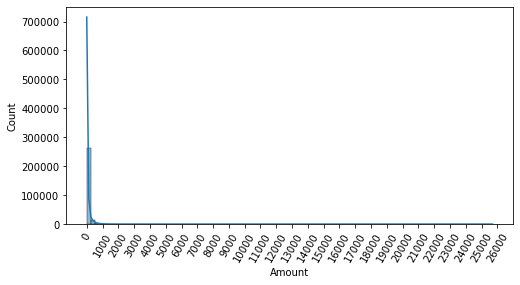

In [14]:
# 데이터 분포도 변환 후 모델 학습/예측/평가
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame 맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [18]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현률: 0.6081, F1: 0.7143, AUC: 0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현률: 0.7500, F1: 0.8409, AUC: 0.9779


<AxesSubplot:>

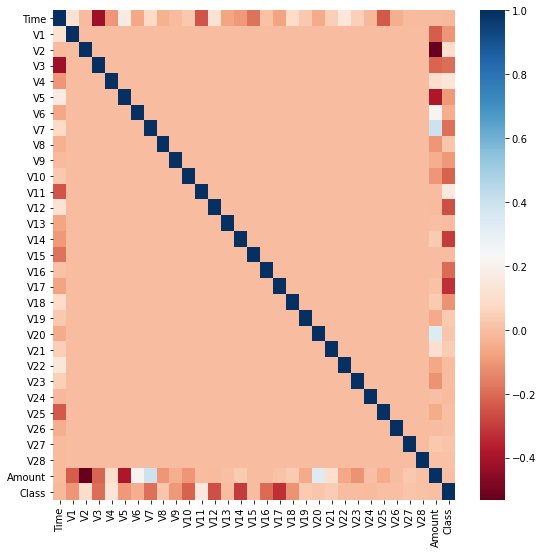

In [20]:
# 이상치 데이터 제거 후 모델 학습/예측/평가
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')  
# RdBu : 양의 상관관계가 높을수록 색깔이 진한 파란색에 가까우며, 음의 상관관계가 높을수록 색깔이 진한 빨간색에 가깝게 표현됨

In [22]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [25]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [26]:
# get_processed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현률: 0.6712, F1: 0.7597, AUC: 0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현률: 0.8288, F1: 0.8897, AUC: 0.9780


In [29]:
# SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [30]:
lr_clf = LogisticRegression(max_iter=1000)
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현률: 0.9247, F1: 0.1023, AUC: 0.9737


In [35]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 thresholds 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축, label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

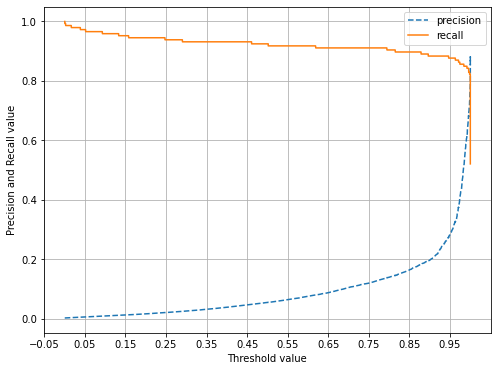

In [36]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [37]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현률: 0.8493, F1: 0.8794, AUC: 0.9814


# 스태킹

In [42]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [43]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만드어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression()

In [44]:
# 개별 모델들을 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [46]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561


In [47]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환, 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [48]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9737


In [55]:
# <STEP 1>
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds 값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트:', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [56]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
RandomForestClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
DecisionTreeClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
AdaBoostClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작


In [59]:
# <STEP 2>
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape, '스태킹 테스트 피처 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 Shape: (114, 4)


In [61]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737
